# Introduction
This project focuses on analyzing the Indian Premier League (IPL) using data to uncover interesting insights about teams, players, and match results. The IPL is one of the most exciting and competitive T20 cricket leagues in the world, and analyzing its data gives us a better understanding of how the game is played and won.

# In this analysis, I used four datasets:

matches_df – Contains match-level details like match winner, toss result, venue, and player of the match.

deliveries_df – Provides ball-by-ball information including runs scored, wickets taken, and player actions.

orange_cap_df – Focuses on batting stats like runs, strike rate, number of 50s and 100s, boundaries, and matches played.

purple_cap_df – Contains bowling stats like wickets, economy rate, maidens, average, and hauls.

Using Python tools like pandas, matplotlib, and seaborn, we performed Exploratory Data Analysis (EDA) to answer key questions:

Which teams and players performed the best overall?

How impactful were toss decisions on match outcomes?

Who were the top run-scorers and wicket-takers?

How are performance metrics like strike rate, average, and economy distributed?

We visualized this data using bar plots, pie charts, line plots, scatter plots, and box plots to make the analysis more intuitive and engaging.



# import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport
from IPython.display import IFrame

In [5]:
deliveries_df=pd.read_csv("deliveries.csv")

In [6]:
deliveries_df.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [7]:
deliveries_df.shape

(17183, 19)

In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17183 entries, 0 to 17182
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_no          17183 non-null  int64  
 1   date              17183 non-null  object 
 2   stage             17183 non-null  object 
 3   venue             17183 non-null  object 
 4   batting_team      17183 non-null  object 
 5   bowling_team      17183 non-null  object 
 6   innings           17183 non-null  int64  
 7   over              17183 non-null  float64
 8   striker           17183 non-null  object 
 9   bowler            17183 non-null  object 
 10  runs_of_bat       17183 non-null  int64  
 11  extras            17183 non-null  int64  
 12  wide              17183 non-null  int64  
 13  legbyes           17183 non-null  int64  
 14  byes              17183 non-null  int64  
 15  noballs           17183 non-null  int64  
 16  wicket_type       872 non-null    object

In [9]:
deliveries_df.isna().sum()

match_no                0
date                    0
stage                   0
venue                   0
batting_team            0
bowling_team            0
innings                 0
over                    0
striker                 0
bowler                  0
runs_of_bat             0
extras                  0
wide                    0
legbyes                 0
byes                    0
noballs                 0
wicket_type         16311
player_dismissed    16311
fielder             16504
dtype: int64

# In logically — not every delivery results in a wicket, so it’s fine for those to be NaN.
# so its not missing data problem, it’s meaning no wicket happened on that ball (domain-specific).

# filling nan values

In [12]:
deliveries_df['wicket_type'] = deliveries_df['wicket_type'].fillna('not out')
deliveries_df['player_dismissed'] = deliveries_df['player_dismissed'].fillna('None')
deliveries_df['fielder'] = deliveries_df['fielder'].fillna('None')

In [128]:
deliveries_df['is_wicket'] = deliveries_df['wicket_type'].apply(lambda x: 0 if x == 'not out' else 1)
deliveries_df['is_wicket'].value_counts()
#deliveries_df['is_wicket'] 

is_wicket
0    16311
1      872
Name: count, dtype: int64

In [14]:
deliveries_df.sample(3)

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder,is_wicket
16645,72,"May 30, 2025",Playoffs stage,Maharaja Yadavindra Singh International Cricke...,GT,MI,2,13.2,Washington Sundar,Bumrah,1,0,0,0,0,0,not out,None,None,0
16241,70,"May 27, 2025",League stage,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,RCB,LSG,2,10.3,Mayank Agarawal,Digvesh Rathi,4,0,0,0,0,0,not out,None,None,0
14185,62,"May 20, 2025",League stage,"Arun Jaitley Stadium, Delhi",CSK,RR,1,13.4,Brevis,Akash Madhwal,0,0,0,0,0,0,bowled,Brevis,None,1


In [15]:
deliveries_df.isna().sum()

match_no            0
date                0
stage               0
venue               0
batting_team        0
bowling_team        0
innings             0
over                0
striker             0
bowler              0
runs_of_bat         0
extras              0
wide                0
legbyes             0
byes                0
noballs             0
wicket_type         0
player_dismissed    0
fielder             0
is_wicket           0
dtype: int64

In [16]:
deliveries_df['is_wicket'].value_counts()

is_wicket
0    16311
1      872
Name: count, dtype: int64

In [17]:
# Create 'is_wicket' as 1 if dismissal happened, else 0
deliveries_df['is_wicket'] = deliveries_df['wicket_type'].notna().astype(int)

#  Extract actual over number (e.g., 0.1 → 0, 1.4 → 1)
deliveries_df['over_number'] = deliveries_df['over'].astype(str).str.extract(r'^(\d+)').astype(int)

# Step 3: Fill NaN in extras sub-columns with 0
for col in ['extras', 'wide', 'legbyes', 'byes', 'noballs']:
    deliveries_df[col] = deliveries_df[col].fillna(0)

# Group by match, over, teams, etc.
over_runs = deliveries_df.groupby(
    ['match_no', 'innings', 'over_number', 'batting_team', 'bowling_team', 'venue']
).agg({
    'runs_of_bat': 'sum',
    'extras': 'sum',
    'wide': 'sum',
    'legbyes': 'sum',
    'byes': 'sum',
    'noballs': 'sum',
    'is_wicket': 'sum'
}).reset_index()

# Compute total runs
over_runs['total_runs'] = over_runs['runs_of_bat'] + over_runs['extras']

In [18]:
deliveries_df.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team',
       'innings', 'over', 'striker', 'bowler', 'runs_of_bat', 'extras', 'wide',
       'legbyes', 'byes', 'noballs', 'wicket_type', 'player_dismissed',
       'fielder', 'is_wicket', 'over_number'],
      dtype='object')

In [19]:
over_runs

,match_no,innings,over_number,batting_team,bowling_team,venue,runs_of_bat,extras,wide,legbyes,byes,noballs,is_wicket,total_runs
0,1,1,0,KKR,RCB,"Eden Gardens, Kolkata",4,0,0,0,0,0,6,4
1,1,1,1,KKR,RCB,"Eden Gardens, Kolkata",1,0,0,0,0,0,6,1
2,1,1,2,KKR,RCB,"Eden Gardens, Kolkata",4,0,0,0,0,0,6,4
3,1,1,3,KKR,RCB,"Eden Gardens, Kolkata",16,0,0,0,0,0,6,16
4,1,1,4,KKR,RCB,"Eden Gardens, Kolkata",15,0,0,0,0,0,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2761,74,2,15,PBKS,RCB,"Narendra Modi Stadium, Ahmedabad",15,2,1,1,0,0,7,17
2762,74,2,16,PBKS,RCB,"Narendra Modi Stadium, Ahmedabad",8,0,0,0,0,0,6,8
2763,74,2,17,PBKS,RCB,"Narendra Modi Stadium, Ahmedabad",3,2,0,2,0,0,6,5
2764,74,2,18,PBKS,RCB,"Narendra Modi Stadium, Ahmedabad",13,0,0,0,0,0,6,13


# Matches data loading

In [21]:
matches_df=pd.read_csv('matches.csv')

In [22]:
matches_df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30


In [23]:
matches_df.shape

(74, 22)

In [24]:
matches_df.columns

Index(['match_id', 'date', 'venue', 'team1', 'team2', 'stage', 'toss_winner',
       'toss_decision', 'first_ings_score', 'first_ings_wkts',
       'second_ings_score', 'second_ings_wkts', 'match_result', 'match_winner',
       'wb_runs', 'wb_wickets', 'balls_left', 'player_of_the_match',
       'top_scorer', 'highscore', 'best_bowling', 'best_bowling_figure'],
      dtype='object')

In [25]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

# converting datatypes of wb_runs and wb_wickest object to numeric

In [27]:
matches_df['wb_runs'] = pd.to_numeric(matches_df['wb_runs'], errors='coerce')
matches_df['wb_wickets'] = pd.to_numeric(matches_df['wb_wickets'], errors='coerce')

In [28]:
matches_df.isna().sum()

match_id                0
date                    0
venue                   0
team1                   0
team2                   0
stage                   0
toss_winner             1
toss_decision           0
first_ings_score        1
first_ings_wkts         1
second_ings_score       2
second_ings_wkts        2
match_result            0
match_winner            3
wb_runs                41
wb_wickets             37
balls_left              2
player_of_the_match     3
top_scorer              3
highscore               3
best_bowling            3
best_bowling_figure     3
dtype: int64

In [29]:
# filling missing data with average value
num_cols = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts',
            'balls_left', 'highscore', 'wb_runs', 'wb_wickets']
for col in num_cols:
    matches_df[col].fillna(matches_df[col].mean(), inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\631499597.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_df[col].fillna(matches_df[col].mean(), inplace=True)


In [30]:
# filling missing data with mode value
cat_cols = ['toss_winner', 'match_winner', 'player_of_the_match', 
            'top_scorer', 'best_bowling', 'best_bowling_figure']
for col in cat_cols:
    matches_df[col].fillna(matches_df[col].mode()[0], inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\531004140.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches_df[col].fillna(matches_df[col].mode()[0], inplace=True)


In [31]:
matches_df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_result           0
match_winner           0
wb_runs                0
wb_wickets             0
balls_left             0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

# loading orange cap dataset

In [33]:
orange_cap_df=pd.read_csv('orange_cap.csv')

In [34]:
orange_cap_df.head()

,Position,Batsman,Team,Matches,Innings,Not_out,Runs,Highest_score,Average,Balls_faced,Strike_rate,Hundreds,Fifties,Ducks,Fours,Sixes
0,1,Sai Sudharsan,GT,15,15,1,759,108,54.21,486,156.17,1,6,0,88,21
1,2,Suryakumar Yadav,MI,16,16,5,717,73,65.18,427,167.91,0,5,0,69,38
2,3,Virat Kohli,RCB,15,15,3,657,73,54.75,454,144.71,0,8,0,66,19
3,4,Shubman Gill,GT,15,15,2,650,93,50.00,417,155.87,0,6,0,62,24
4,5,Mitchell Marsh,LSG,13,13,0,627,117,48.23,383,163.70,1,6,2,56,37


In [35]:
orange_cap_df.shape

(15, 16)

In [36]:
orange_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Position       15 non-null     int64  
 1   Batsman        15 non-null     object 
 2   Team           15 non-null     object 
 3   Matches        15 non-null     int64  
 4   Innings        15 non-null     int64  
 5   Not_out        15 non-null     int64  
 6   Runs           15 non-null     int64  
 7   Highest_score  15 non-null     int64  
 8   Average        15 non-null     float64
 9   Balls_faced    15 non-null     int64  
 10  Strike_rate    15 non-null     float64
 11  Hundreds       15 non-null     int64  
 12  Fifties        15 non-null     int64  
 13  Ducks          15 non-null     int64  
 14  Fours          15 non-null     int64  
 15  Sixes          15 non-null     int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 2.0+ KB


In [37]:
orange_cap_df.isna().sum()

Position         0
Batsman          0
Team             0
Matches          0
Innings          0
Not_out          0
Runs             0
Highest_score    0
Average          0
Balls_faced      0
Strike_rate      0
Hundreds         0
Fifties          0
Ducks            0
Fours            0
Sixes            0
dtype: int64

# loading purple cap dataset 

In [39]:
purple_cap_df=pd.read_csv("purple_cap.csv")

In [40]:
purple_cap_df.tail()

,Position,Bowler,Team,Matches,Innings,Balls,Overs,Maidens,Runs,Wickets,Best_bowling_figure,Economy_rate,Four_wicket_haul,Five_wicket_hall
10,11,Vaibhav Arora,KKR,12,12,255,42.3,1,430,17,3--29,10.11,0,0
11,12,Pat Cummins,SRH,14,14,298,49.4,0,450,16,3--19,9.06,0,0
12,13,Marco Jansen,PBKS,14,14,283,47.1,0,434,16,3--17,9.20,0,0
13,14,Mohammed Siraj,GT,15,15,342,57.0,0,527,16,4--17,9.24,1,0
14,15,Yuzvendra Chahal,PBKS,14,13,270,45.0,0,430,16,4--28,9.55,2,0


In [41]:
purple_cap_df.shape

(15, 14)

In [42]:
purple_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Position             15 non-null     int64  
 1   Bowler               15 non-null     object 
 2   Team                 15 non-null     object 
 3   Matches              15 non-null     int64  
 4   Innings              15 non-null     int64  
 5   Balls                15 non-null     int64  
 6   Overs                15 non-null     float64
 7   Maidens              15 non-null     int64  
 8   Runs                 15 non-null     int64  
 9   Wickets              15 non-null     int64  
 10  Best_bowling_figure  15 non-null     object 
 11  Economy_rate         15 non-null     float64
 12  Four_wicket_haul     15 non-null     int64  
 13  Five_wicket_hall     15 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.8+ KB


In [43]:
purple_cap_df.isna().sum()

Position               0
Bowler                 0
Team                   0
Matches                0
Innings                0
Balls                  0
Overs                  0
Maidens                0
Runs                   0
Wickets                0
Best_bowling_figure    0
Economy_rate           0
Four_wicket_haul       0
Five_wicket_hall       0
dtype: int64

# Generating EDA Report with pandas-profiling

In [45]:
profile = ProfileReport(deliveries_df, title="EDA deliveries", explorative=True)
profile.to_file("eda_deliveries.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:02<00:00,  9.37it/s]
C:\Users\ACER\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[4 4 4 ... 4 4 4]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\ACER\anaconda3\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
profile = ProfileReport(matches_df, title="EDA deliveries", explorative=True)
profile.to_file("eda_matches.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:01<00:00, 13.67it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
profile = ProfileReport(orange_cap_df, title="EDA deliveries", explorative=True)
profile.to_file("eda_orange_cap.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 37.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
profile = ProfileReport(purple_cap_df, title="EDA deliveries", explorative=True)
profile.to_file("eda_purple_cap.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 25.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Displaying the EDA Report in an IFrame

In [50]:
IFrame(src='eda_deliveries.html', width=1000, height=600)

In [51]:
IFrame(src='eda_matches.html', width=1000, height=600)

In [52]:
IFrame(src='eda_orange_cap.html', width=1000, height=600)

In [53]:
IFrame(src='eda_purple_cap.html', width=1000, height=600)

# Total Runs Scored in Each IPL Match

In this section, we'll calculate and visualize the total runs scored (excluding extras) in each match of the tournament.


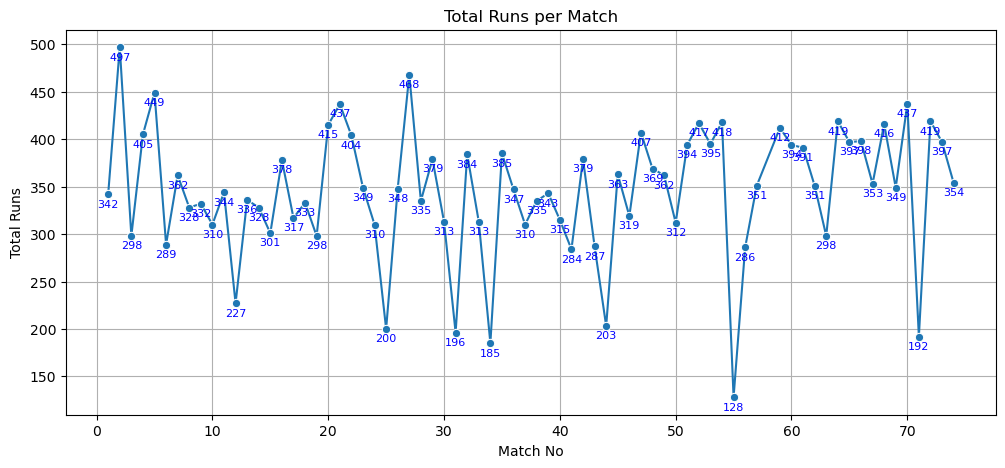

In [55]:
# Total runs (from bat) scored in each match
total_runs_per_match = deliveries_df.groupby('match_no')['runs_of_bat'].sum().reset_index()

# Line plot of total runs per match
plt.figure(figsize=(12,5))
sns.lineplot(data=total_runs_per_match, x='match_no', y='runs_of_bat', marker='o')
plt.title('Total Runs per Match')
plt.xlabel('Match No')
plt.ylabel('Total Runs')
plt.grid(True)

# Show run value below each dot
for i, row in total_runs_per_match.iterrows():
    plt.text(row['match_no'], row['runs_of_bat'] - 5, str(row['runs_of_bat']),
             ha='center', va='top', fontsize=8, color='blue')

plt.show()

# Top 10 Bowlers by Total Dismissals

In this analysis, we identify the top 10 bowlers who have taken the most wickets in the tournament.  
We use a **horizontal bar chart** for better readability, especially when showing player names.


C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\1999714243.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batsmen, x='balls', y='striker', palette='coolwarm')


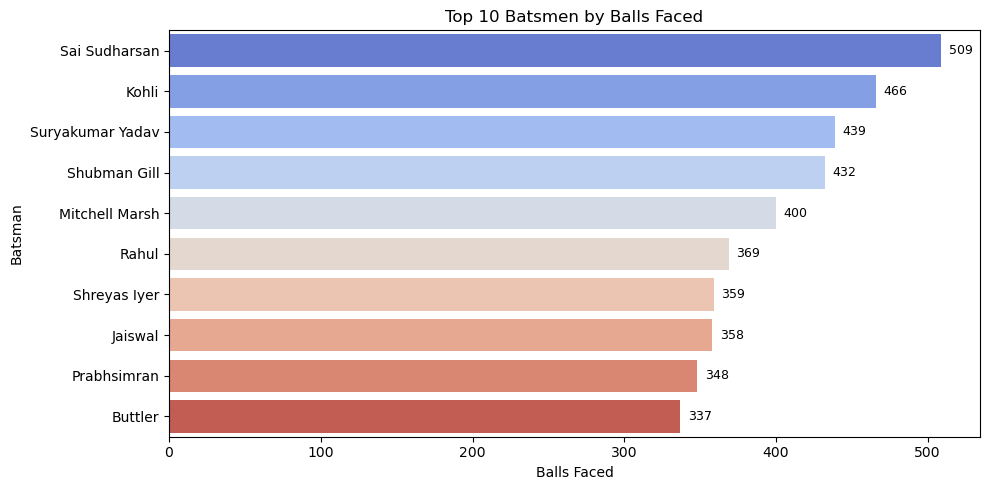

In [57]:
# Count balls faced by each batsman
balls_faced = deliveries_df.groupby('striker').size().reset_index(name='balls')

# Get top 10 batsmen who faced the most balls
top_batsmen = balls_faced.sort_values(by='balls', ascending=False).head(10)

# Horizontal bar plot of balls faced
plt.figure(figsize=(10, 5))
sns.barplot(data=top_batsmen, x='balls', y='striker', palette='coolwarm')
plt.title('Top 10 Batsmen by Balls Faced')
plt.xlabel('Balls Faced')
plt.ylabel('Batsman')

# Add value labels next to bars
for i in range(len(top_batsmen)):
    plt.text(x=top_batsmen['balls'].values[i] + 5, y=i,
             s=str(top_batsmen['balls'].values[i]),
             va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# Top 10 Batsmen by Strike Rate

In this section, we calculate the **strike rate** of each batsman, which shows how fast they score runs.  
Strike Rate is calculated as:  
> `Strike Rate = (Total Runs / Balls Faced) * 100`  

We then plot the top 10 players with the highest strike rates using a vertical bar chart.


# Distribution of Extra Runs by Type

This chart shows the total count of each type of extra run conceded in the tournament.  
The extras considered here are:
- Wide balls
- Leg byes
- Byes
- No balls

Understanding extras helps analyze a bowling side's discipline and overall match control.


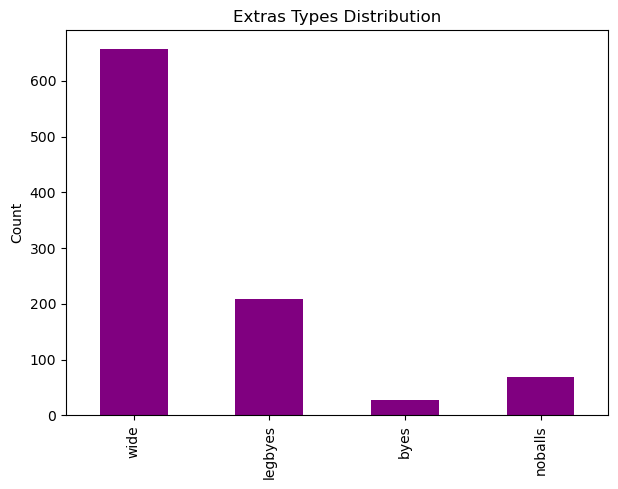

In [60]:
# Sum the total extras by type
extras_types = ['wide', 'legbyes', 'byes', 'noballs']
extras = deliveries_df[extras_types].sum()

# Bar chart of extras distribution
plt.figure(figsize=(7,5))
extras.plot(kind='bar', color='purple')
plt.title('Extras Types Distribution')
plt.ylabel('Count')
plt.show()

# Distribution of Dismissal Types

This bar chart visualizes how players got out during the tournament.  
It helps identify common dismissal types such as:
- Caught
- Bowled
- LBW
- Run out  
and others.

Analyzing dismissal patterns provides insight into bowling strategies and batting weaknesses.

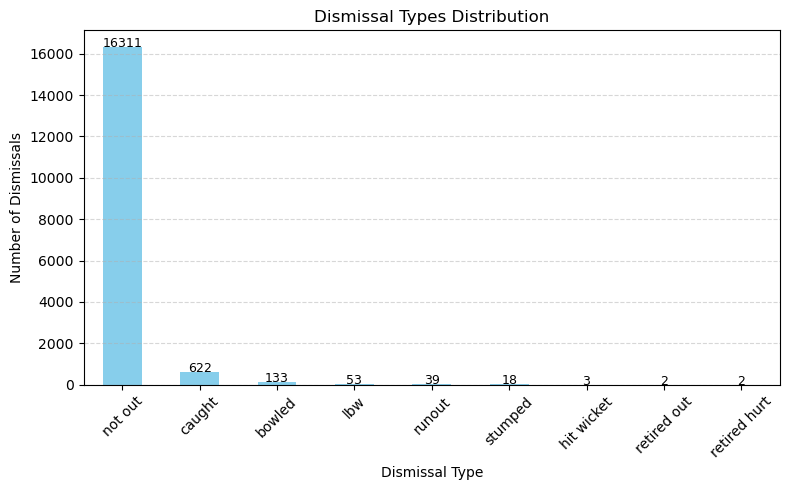

In [62]:
# Count each type of dismissal
dismissal_types = deliveries_df['wicket_type'].value_counts()

# Plot dismissal type distribution
plt.figure(figsize=(8,5))
dismissal_types.plot(kind='bar', color='skyblue')
plt.title('Dismissal Types Distribution')
plt.xlabel('Dismissal Type')
plt.ylabel('Number of Dismissals')

# Add count labels above each bar
for index, value in enumerate(dismissal_types):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=9, color='black')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Average Runs per Over

This line chart shows how many runs are scored on average in each over.  
It helps us understand which overs are more productive for the batting side.

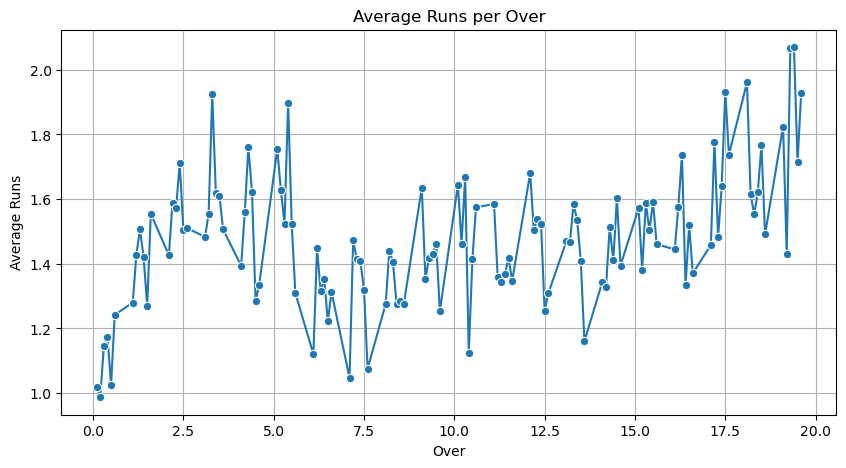

In [64]:
# Calculate average runs scored in each over
runs_per_over = deliveries_df.groupby('over')['runs_of_bat'].mean()

# Line plot of average runs per over
plt.figure(figsize=(10,5))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker='o')
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.grid(True)
plt.show()

# Top 10 Batsman vs Bowler Pairs by Balls Faced

This bar chart shows the top 10 batsman-bowler matchups based on how many balls were faced.  
It helps reveal which bowlers consistently bowled to certain batsmen, possibly due to matchups or strategy.

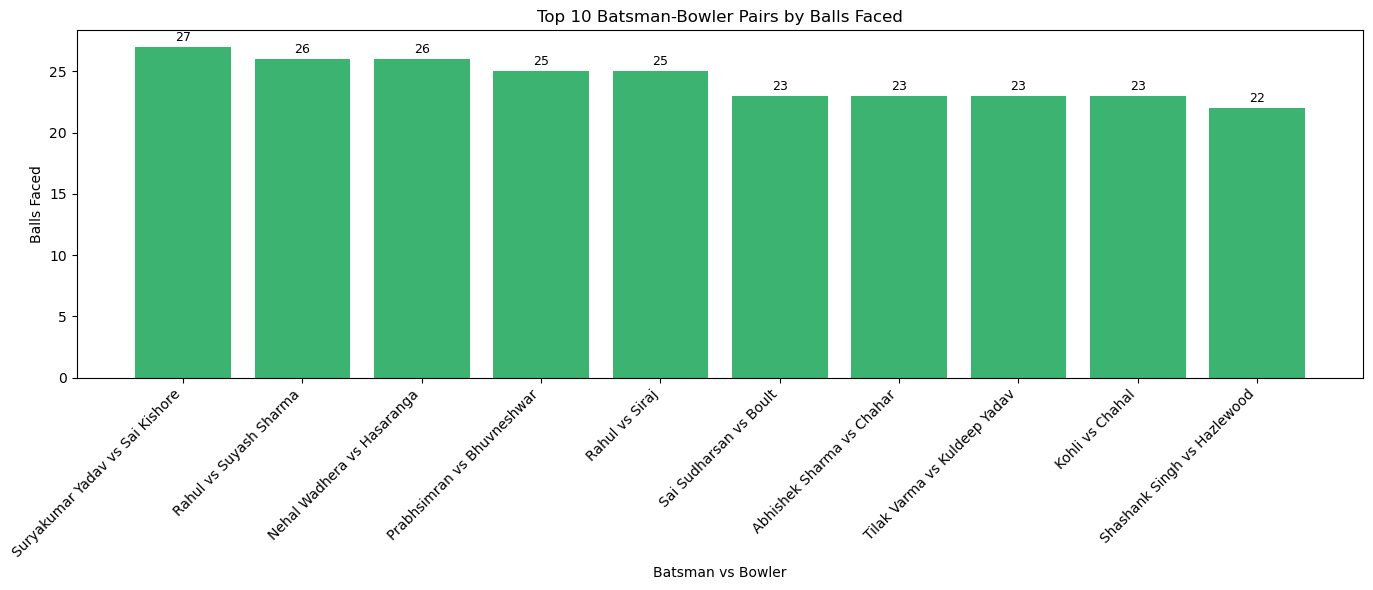

In [66]:
# Count how many times each batsman faced a specific bowler
pairs = deliveries_df.groupby(['striker', 'bowler']).size().reset_index(name='balls_faced')

# Get top 10 pairs with most deliveries
top_pairs = pairs.sort_values(by='balls_faced', ascending=False).head(10)
top_pairs['pair'] = top_pairs['striker'] + ' vs ' + top_pairs['bowler']

# Plotting
plt.figure(figsize=(14,6))
plt.bar(top_pairs['pair'], top_pairs['balls_faced'], color='mediumseagreen')
plt.title('Top 10 Batsman-Bowler Pairs by Balls Faced')
plt.xlabel('Batsman vs Bowler')
plt.ylabel('Balls Faced')

# Add value labels
for index, value in enumerate(top_pairs['balls_faced']):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Wickets vs Non-Wickets Count

This bar chart shows how many deliveries resulted in a wicket (`1`) and how many didn’t (`0`).  
It gives a quick look at how often wickets fall in the dataset.


C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\3834763463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=deliveries_df, x='is_wicket', palette='Set2')


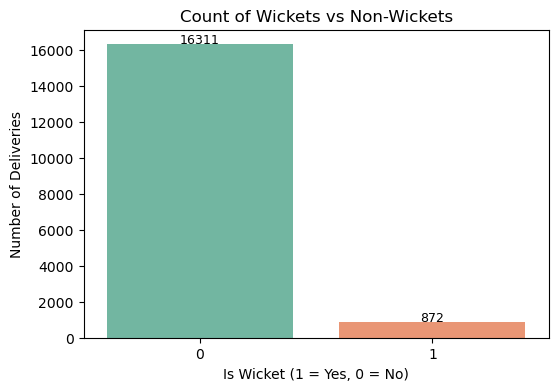

In [130]:
# Count plot of deliveries that resulted in a wicket vs not
plt.figure(figsize=(6,4))
sns.countplot(data=deliveries_df, x='is_wicket', palette='Set2')
plt.title('Count of Wickets vs Non-Wickets')
plt.xlabel('Is Wicket (1 = Yes, 0 = No)')
plt.ylabel('Number of Deliveries')

# Add number labels above bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, 
             p.get_height() + 50, 
             int(p.get_height()), 
             ha='center', fontsize=9)

plt.show()

In [69]:
deliveries_df['is_wicket'].value_counts()

is_wicket
1    17183
Name: count, dtype: int64

# Top 10 Highest Individual Scores by Batsmen

This bar chart shows the top 10 highest scores made by individual batsmen in a single match.  
It highlights the best single-innings performances from the tournament.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\2236002713.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_highest_scores, x='striker', y='runs_of_bat', palette='viridis')


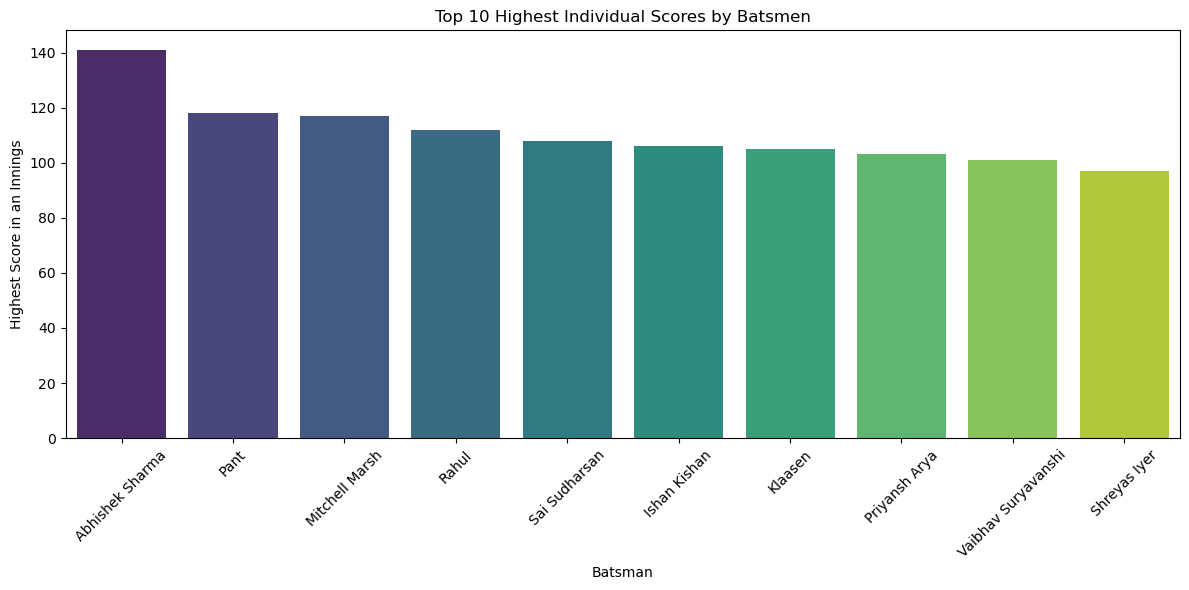

In [71]:
# Total runs scored by each batsman in every match
batsman_scores = deliveries_df.groupby(['match_no', 'striker'])['runs_of_bat'].sum().reset_index()

# Get the highest score by each batsman across all matches
highest_scores = batsman_scores.groupby('striker')['runs_of_bat'].max().reset_index()

# Top 10 highest individual scores
top_highest_scores = highest_scores.sort_values(by='runs_of_bat', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=top_highest_scores, x='striker', y='runs_of_bat', palette='viridis')
plt.title('Top 10 Highest Individual Scores by Batsmen')
plt.xlabel('Batsman')
plt.ylabel('Highest Score in an Innings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Over-wise Total Maximum Runs
This chart helps us understand which over in the match typically had the highest total runs scored, across all matches.

The data is grouped over each over number.

For each over, the maximum number of total runs scored (in any match) is shown.

This helps us find which overs are most dangerous for the bowlers (like death overs or powerplay).

The chart uses a barplot to show the highest run-scoring overs.

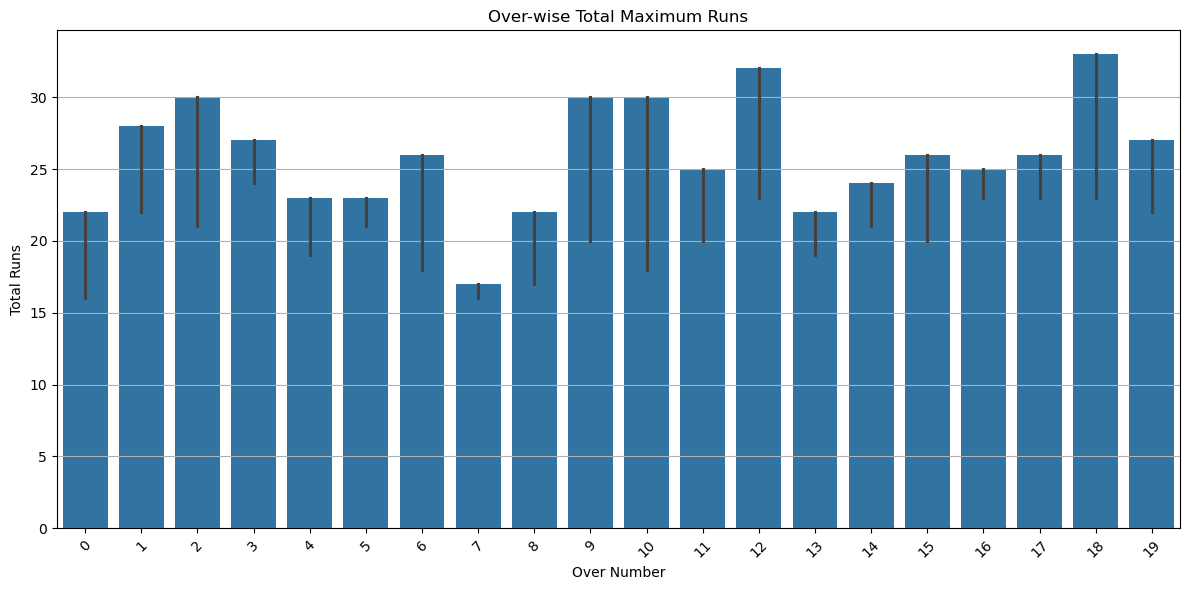

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(data=over_runs, x='over_number', y='total_runs', estimator=max)
plt.title('Over-wise Total Maximum Runs')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.grid(axis='y')

# Fix overlapping x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Over-wise Total Minimum Runs
- This bar chart displays the **minimum number of total runs scored** in each over across all matches.
- Helps us understand which overs are typically **less productive** for batting.
- Data is grouped by `over` and the **minimum** total runs from all matches is shown per over.


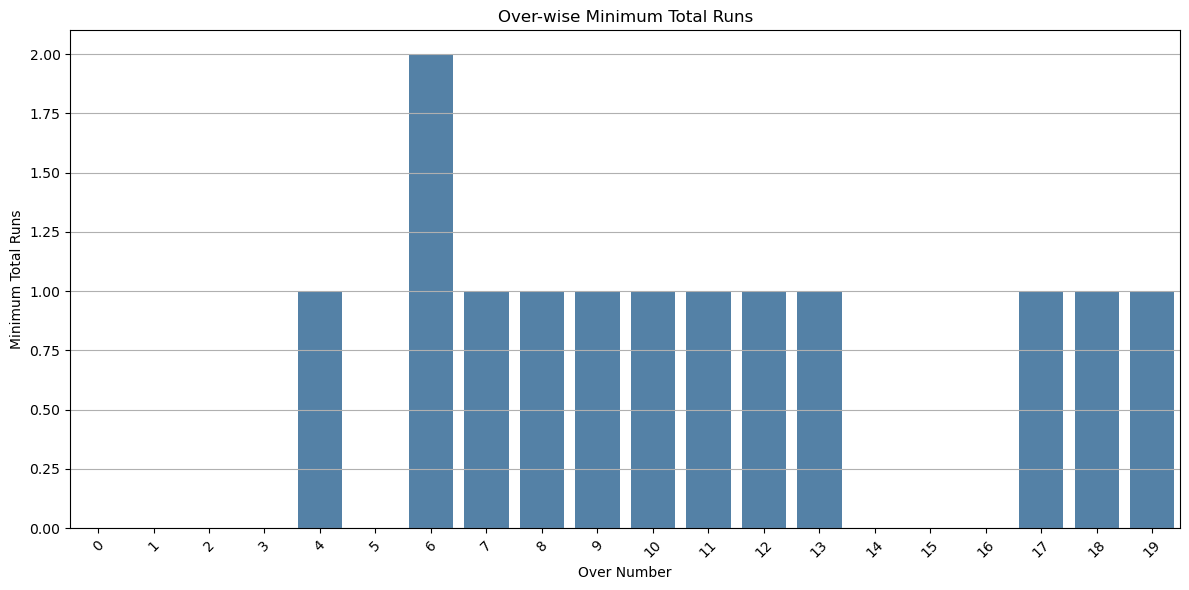

In [75]:
#  get min total runs per over
min_runs_per_over = over_runs.groupby('over_number')['total_runs'].min().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=min_runs_per_over, x='over_number', y='total_runs', color='steelblue')

plt.title('Over-wise Minimum Total Runs')
plt.xlabel('Over Number')
plt.ylabel('Minimum Total Runs')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Over-wise Total Runs (Line Chart)

This line chart visualizes the **total runs scored in each over** (aggregated across matches).  
It helps identify patterns in scoring across the 20 overs of an innings, such as powerplay bursts or death-over surges.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\816063672.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=over_runs, x='over_number', y='total_runs', estimator='sum', ci=None, marker='o')


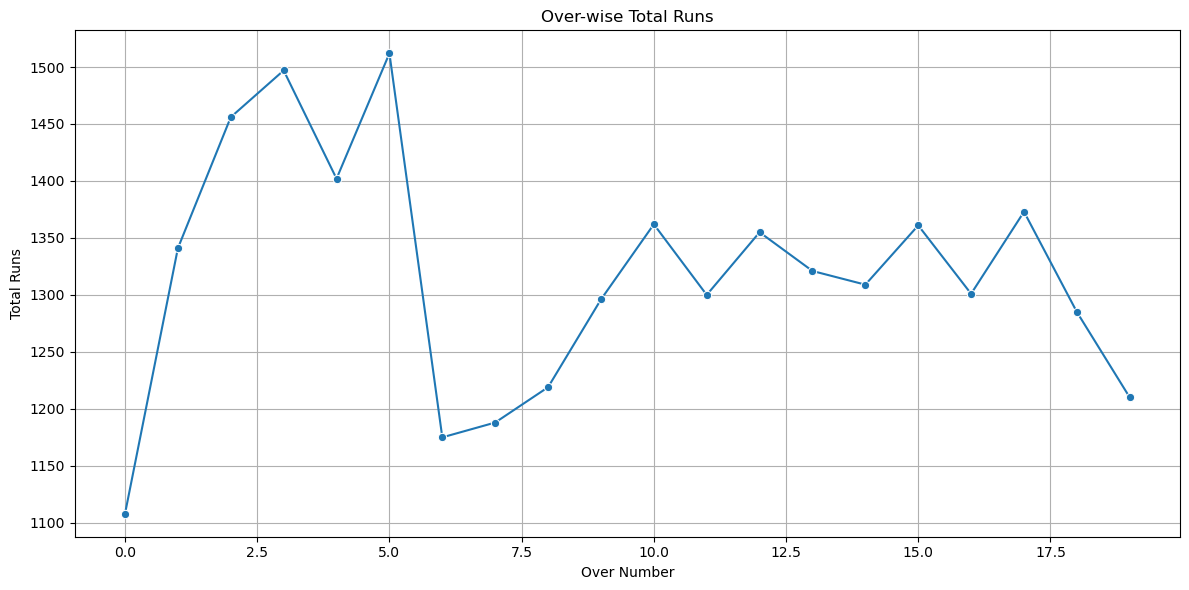

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(data=over_runs, x='over_number', y='total_runs', estimator='sum', ci=None, marker='o')

plt.title('Over-wise Total Runs')
plt.xlabel('Over Number')
plt.ylabel('Total Runs')
plt.grid(True)
plt.tight_layout()
plt.show()

# Over-wise Total Wickets in IPL 2025 Season

This bar chart shows the **total number of wickets** taken in each over across all IPL 2025 matches.  
It helps identify the overs where bowlers are most successful, such as middle overs or death overs.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\443225962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wickets_per_over, x='over_number', y='is_wicket', palette='magma')


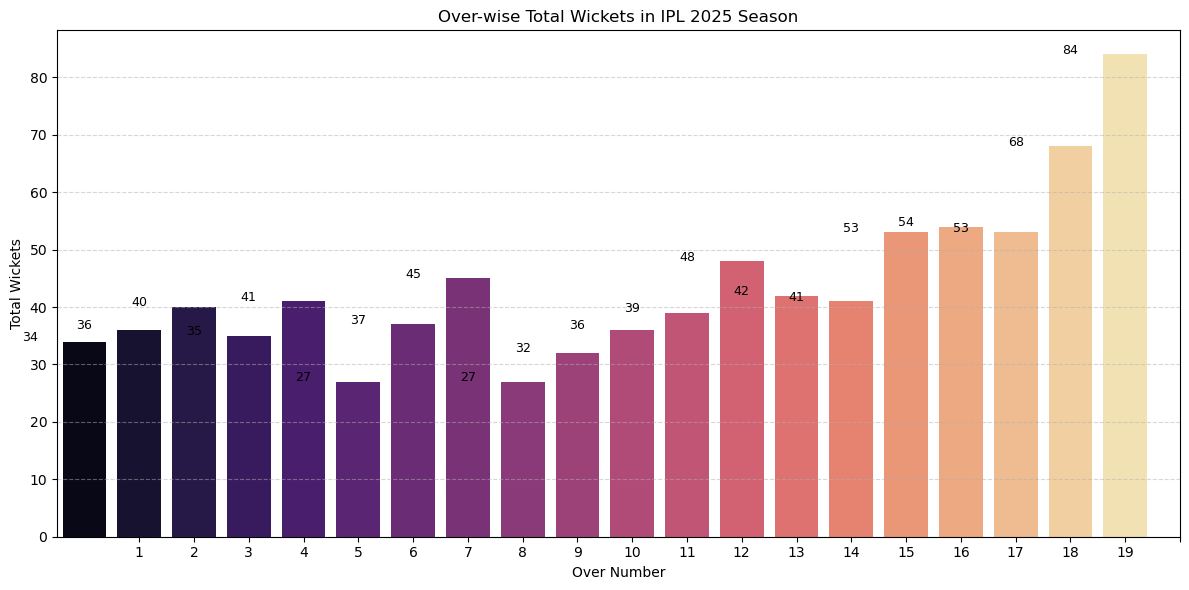

In [132]:
# Calculate total wickets per over
wickets_per_over = deliveries_df.groupby('over_number')['is_wicket'].sum().reset_index()

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(data=wickets_per_over, x='over_number', y='is_wicket', palette='magma')

# Annotate bars with wicket counts
for index, row in wickets_per_over.iterrows():
    plt.text(row['over_number'] - 1, row['is_wicket'] + 0.1, int(row['is_wicket']),
             ha='center', fontsize=9, color='black')

plt.xlabel('Over Number')
plt.ylabel('Total Wickets')
plt.title('Over-wise Total Wickets in IPL 2025 Season')
plt.xticks(range(1, 21))  # Adjust if needed based on your data
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Matches Played in Each Stage of the Tournament
This analysis shows how many matches were played at each stage of the tournament, such as League, Playoffs, Final, etc.

We use the value_counts() function to count how many matches happened in each stage.

A bar chart is used to visualize the number of matches per stage.

The chart is styled with a sky-blue color for better readability.

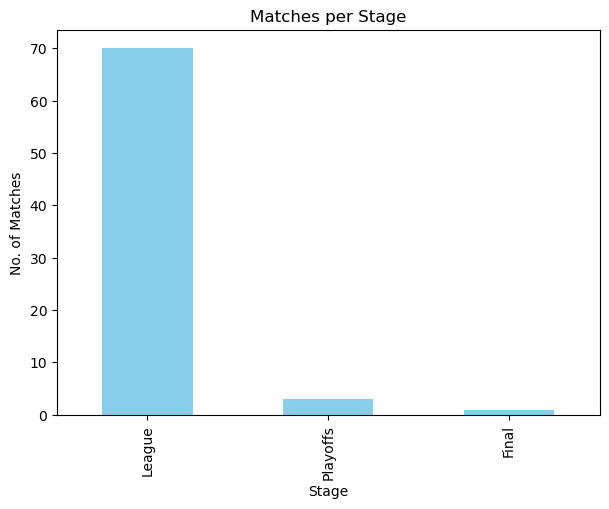

In [81]:
matches_per_season = matches_df['stage'].value_counts()

plt.figure(figsize=(7,5))
matches_per_season.plot(kind='bar', color='skyblue')
plt.title('Matches per Stage')
plt.xlabel('Stage')
plt.ylabel('No. of Matches')
plt.show()

# Toss Decision vs Match Result - Stacked Bar Chart
This code shows how the decision taken after winning the toss (bat or field) affects the match result

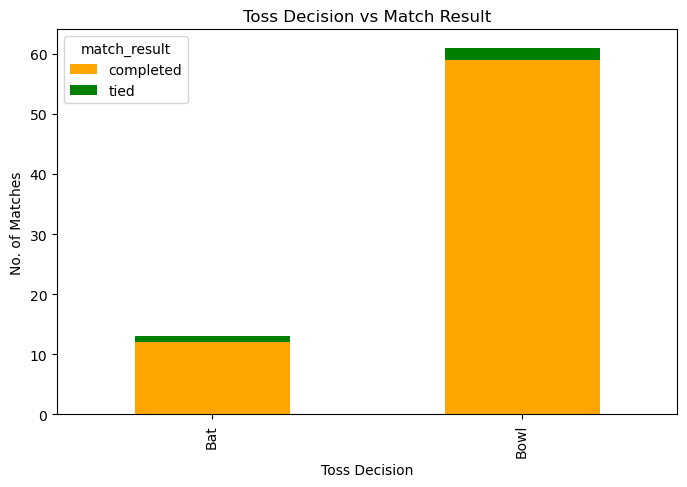

In [83]:
toss_decision = matches_df.groupby(['toss_decision', 'match_result']).size().unstack()

toss_decision.plot(kind='bar', stacked=True, figsize=(8,5), color=['orange', 'green'])
plt.title('Toss Decision vs Match Result')
plt.ylabel('No. of Matches')
plt.xlabel('Toss Decision')
plt.show()

# Toss Winner vs Match Winner - Pie Chart
This pie chart shows whether the team that won the toss also won the match. It gives a quick visual of how often toss-winning teams actually win the game.

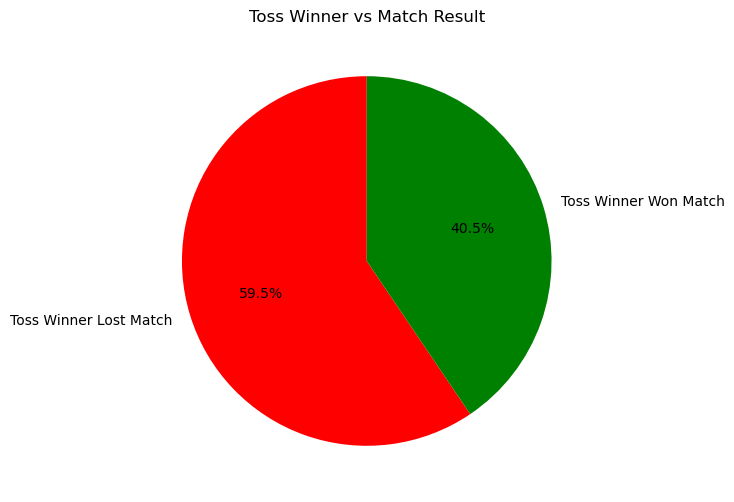

In [85]:
# Create a column to check if toss winner also won the match
matches_df['toss_win_match_win'] = (matches_df['toss_winner'] == matches_df['match_winner']).astype(int)

#1 = Toss winner won match, 0 = Toss winner lost match
toss_win_counts = matches_df['toss_win_match_win'].value_counts()

# index for labels in pie chart
toss_win_counts.index = ['Toss Winner Lost Match', 'Toss Winner Won Match']

#  pie chart
plt.figure(figsize=(6,6))
toss_win_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'], startangle=90)
plt.title('Toss Winner vs Match Result')
plt.ylabel('')  
plt.show()

# Top 10 Most Successful Teams in Tournament History
This chart highlights the top 10 teams that have won the most matches in the tournament.

We count how many matches each team has won using the match_winner column.

Then we select only the top 10 teams with the highest win counts.

A bar chart is used to easily compare team performance.

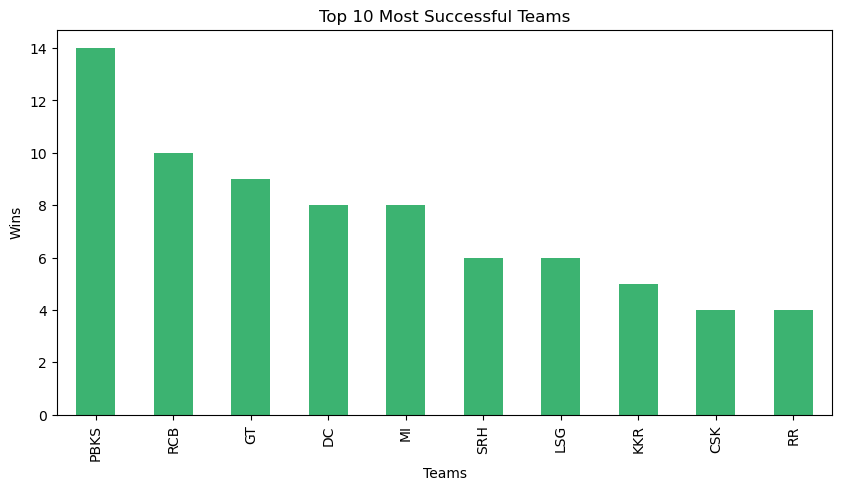

In [87]:
# Count how many matches each team has won and take the top 10
team_wins = matches_df['match_winner'].value_counts().head(10)

plt.figure(figsize=(10,5))  
team_wins.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Most Successful Teams')
plt.xlabel('Teams')                         
plt.ylabel('Wins')                          
plt.show()                                  

# Match Winning Margins: Runs vs Wickets
This visualization shows how teams win matches — either by runs or wickets — and what the typical winning margins look like.

The plot is divided into two side-by-side histograms:

Left: How many runs teams win by when defending a total.

Right: How many wickets are left when teams chase and win.

Helps analyze whether teams usually win by big margins or close finishes.

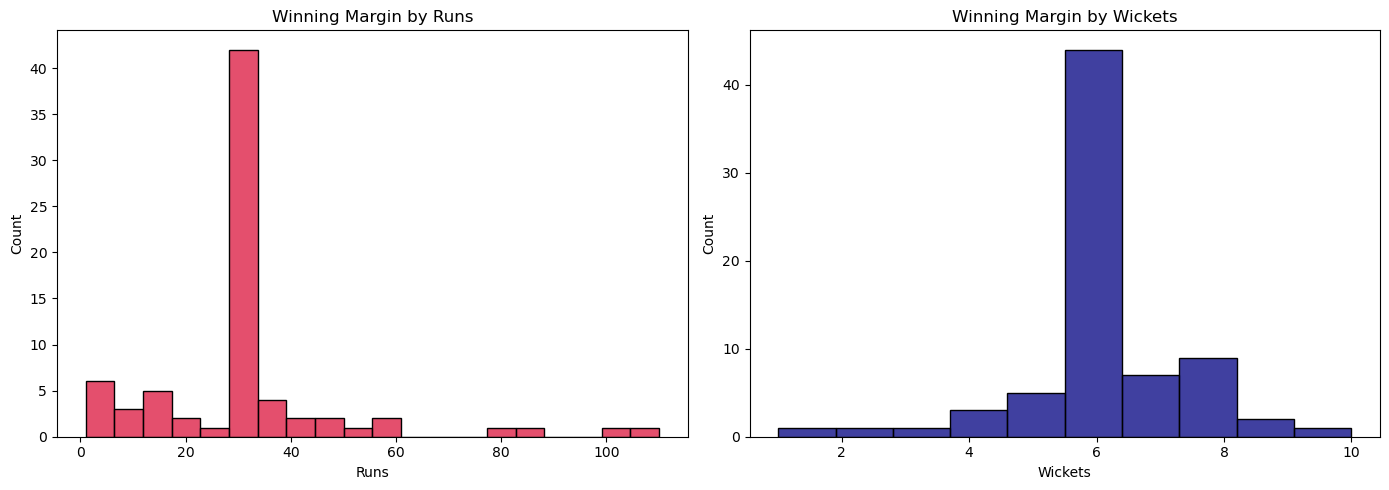

In [89]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.histplot(matches_df['wb_runs'], bins=20, color='crimson')
plt.title('Winning Margin by Runs')
plt.xlabel('Runs')

plt.subplot(1,2,2)
sns.histplot(matches_df['wb_wickets'].dropna(), bins=10, color='navy')
plt.title('Winning Margin by Wickets')
plt.xlabel('Wickets')

plt.tight_layout()
plt.show()

# Top 10 Venues by Number of Matches
This chart shows the top 10 stadiums/venues where the most matches have been played.

We use the venue column to count how many matches took place at each location.

A horizontal bar chart is used for better readability.

The chart is sorted with the most used venue at the top using invert_yaxis().

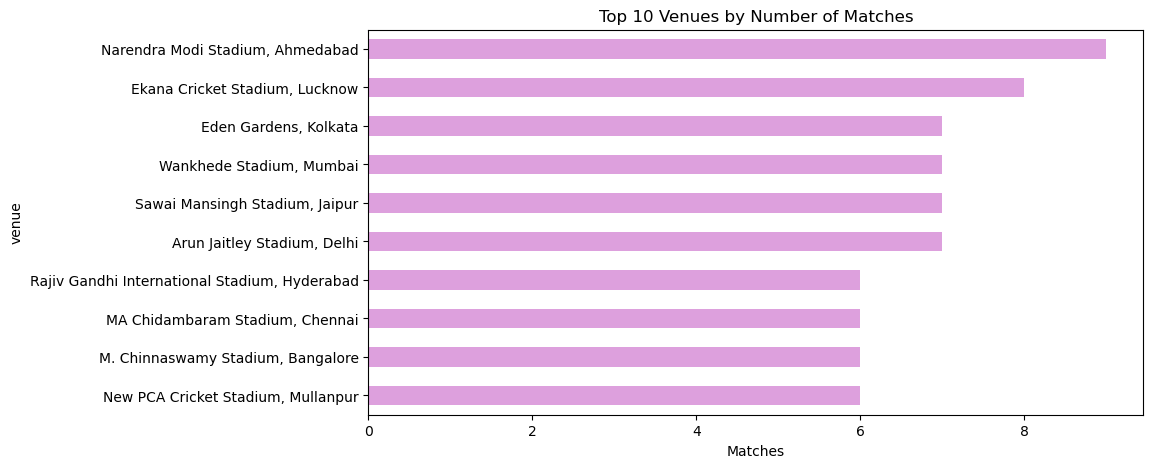

In [91]:
venues = matches_df['venue'].value_counts().head(10)

plt.figure(figsize=(10,5))
venues.plot(kind='barh', color='plum')
plt.title('Top 10 Venues by Number of Matches')
plt.xlabel('Matches')
plt.gca().invert_yaxis()
plt.show()

# Top 10 Players with Most "Player of the Match" Awards
This chart shows the top 10 players who have received the most Player of the Match awards.

The player_of_the_match column is used to count how many times each player has received the award.

A bar chart is used to compare their performance visually.

The players with the highest match impact over time are highlighted here.

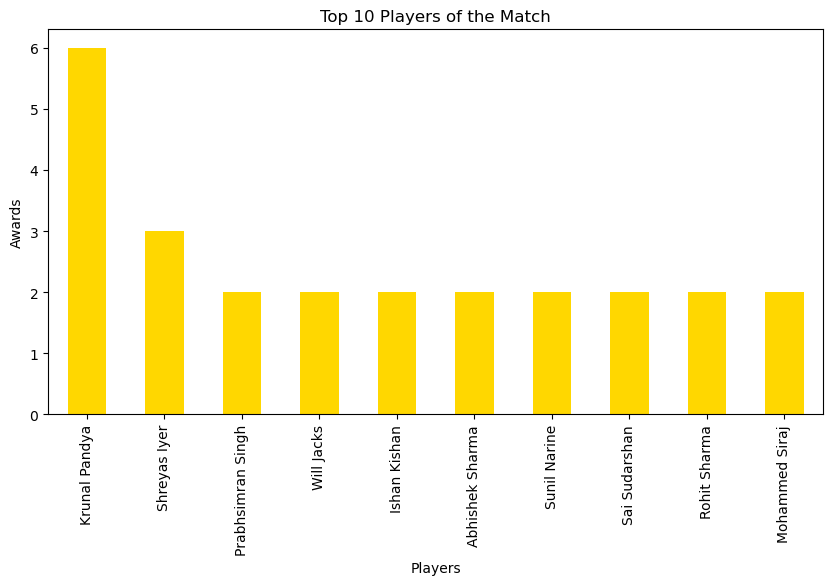

In [93]:
pom = matches_df['player_of_the_match'].value_counts().head(10)

plt.figure(figsize=(10,5))
pom.plot(kind='bar', color='gold')
plt.title('Top 10 Players of the Match')
plt.xlabel('Players')
plt.ylabel('Awards')
plt.show()

# Top 10 Run Scorers 
This chart shows the top 10 batsmen with the highest total runs in the tournament.

Data is taken from the orange_cap_df .

A horizontal bar chart is plotted using Seaborn to display runs scored by each top batsman

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\4215448970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orange_cap_df, x='Runs', y='Batsman', palette='YlOrRd')


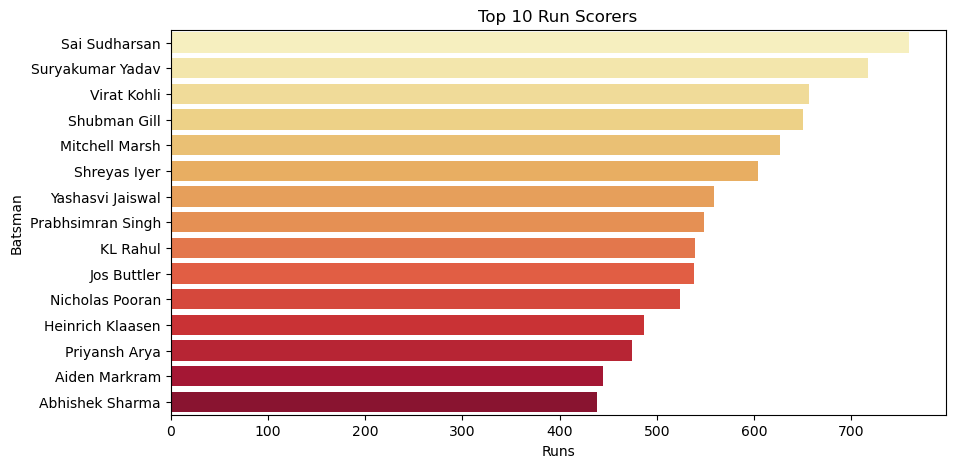

In [95]:
plt.figure(figsize=(10,5))
sns.barplot(data=orange_cap_df, x='Runs', y='Batsman', palette='YlOrRd')
plt.title('Top 10 Run Scorers')
plt.show()

# Top 10 Batsmen by Matches Played 
This chart displays the top 10 batsmen who have played the most matches among Orange Cap contenders.

The orange_cap_df is sorted by the number of matches played, in descending order.

A Seaborn barplot is used to visualize the data.

The x-axis shows the batsmen, while the y-axis shows how many matches they played.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\828301597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_matches_played, x='Batsman', y='Matches', palette='plasma')


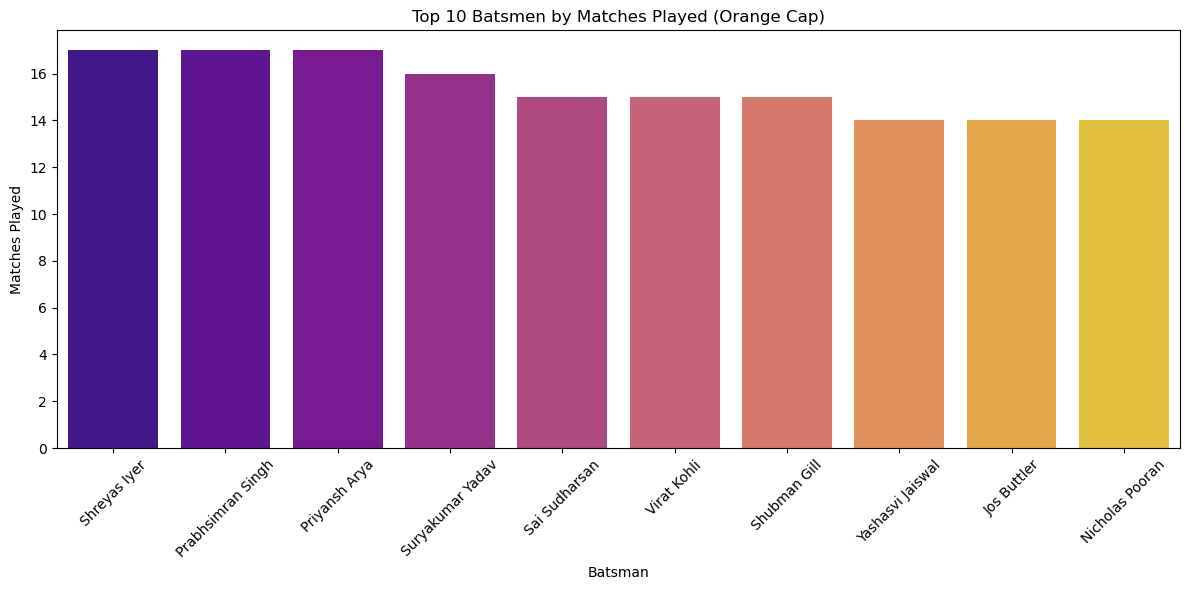

In [97]:
top_matches_played = orange_cap_df.sort_values(by='Matches', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_matches_played, x='Batsman', y='Matches', palette='plasma')
plt.title('Top 10 Batsmen by Matches Played (Orange Cap)')
plt.xlabel('Batsman')
plt.ylabel('Matches Played')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Batsmen by Not Outs 

This chart highlights the top 10 batsmen who remained not out the most number of times among Orange Cap contenders.

The data is sorted by the Not_out column in descending order.

A bar plot is used to show the count of times each batsman remained not out.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\1616149117.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_not_outs, x='Batsman', y='Not_out', palette='coolwarm')


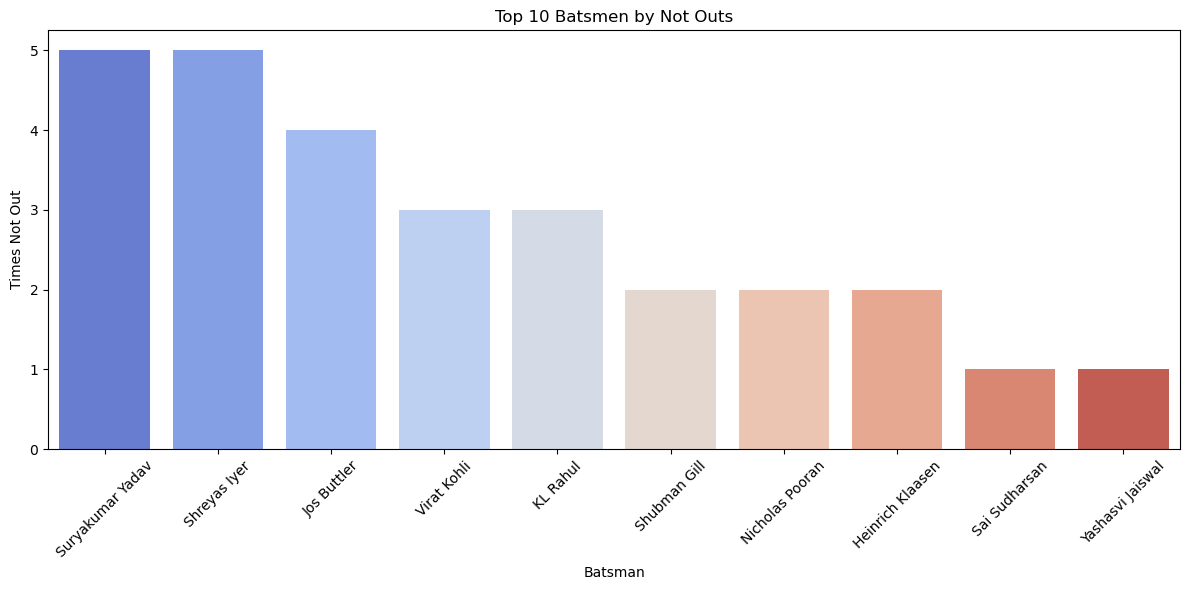

In [99]:
top_not_outs = orange_cap_df.sort_values(by='Not_out', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_not_outs, x='Batsman', y='Not_out', palette='coolwarm')
plt.title('Top 10 Batsmen by Not Outs')
plt.xlabel('Batsman')
plt.ylabel('Times Not Out')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Batsmen by Strike Rate 
This chart shows the top 10 batsmen with the highest strike rates among Orange Cap contenders.

The data is sorted by the Strike_rate column in descending order.

A horizontal bar chart is used to better compare strike rates visually.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\2271231192.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sr, x='Strike_rate', y='Batsman', palette='viridis')


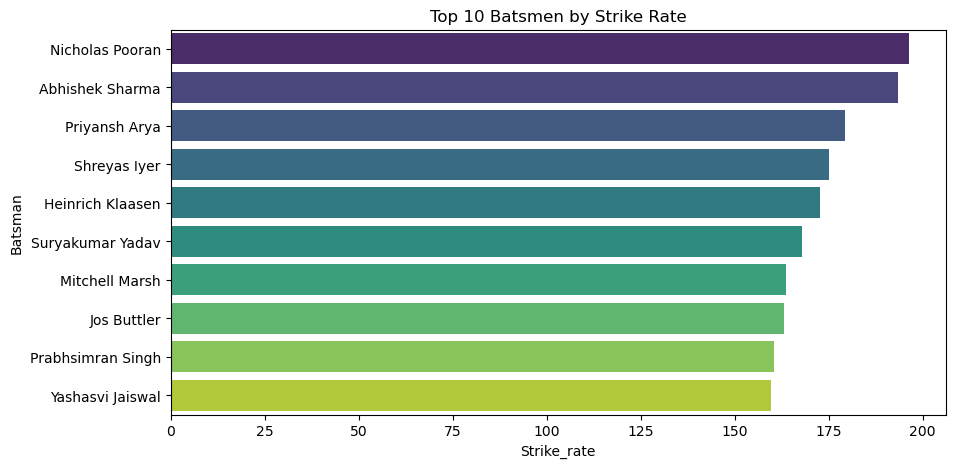

In [101]:
top_sr = orange_cap_df.sort_values(by='Strike_rate', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_sr, x='Strike_rate', y='Batsman', palette='viridis')
plt.title('Top 10 Batsmen by Strike Rate')
plt.show()

# Top 10 Batsmen with Most Ducks
This chart shows the top 10 batsmen who have been dismissed for zero runs (ducks) the most number of times.

First, we calculate total runs per match per batsman from the deliveries_df.

Then we filter out matches where a batsman scored exactly 0 runs.

After that, we count how many times each batsman scored a duck.

Finally, we sort and plot the top 10 batsmen with the most ducks using a bar chart.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\1643152044.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ducks, x='Batsman', y='Ducks', palette='Reds')


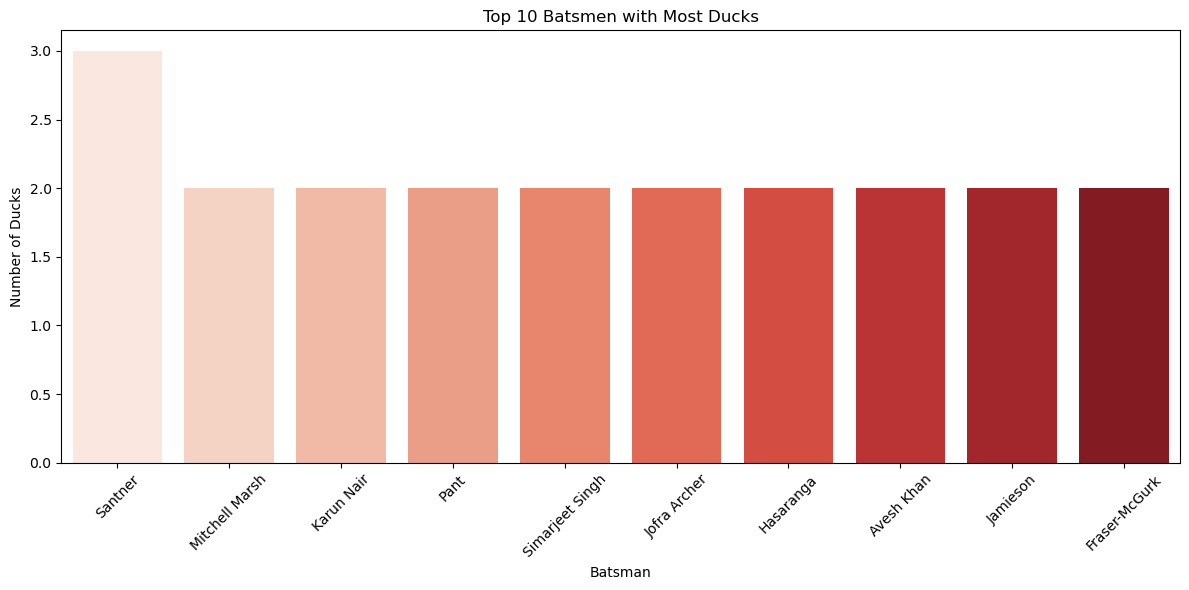

In [103]:
batsman_runs_per_match = deliveries_df.groupby(['match_no', 'striker'])['runs_of_bat'].sum().reset_index()
ducks = batsman_runs_per_match[batsman_runs_per_match['runs_of_bat'] == 0]

ducks_count = ducks['striker'].value_counts().reset_index()
ducks_count.columns = ['Batsman', 'Ducks']

top_ducks = ducks_count.sort_values(by='Ducks', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_ducks, x='Batsman', y='Ducks', palette='Reds')
plt.title('Top 10 Batsmen with Most Ducks')
plt.xlabel('Batsman')
plt.ylabel('Number of Ducks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Batsmen: 50s vs 100s Comparison 
This chart compares how many fifties (50s) and centuries (100s) the top 10 Orange Cap contenders have scored.

The left bar chart shows the number of half-centuries (50+ runs).

The right bar chart shows the number of centuries (100+ runs).

Data is taken from the top 10 rows of the orange_cap_df, assuming it's already sorted by performance.

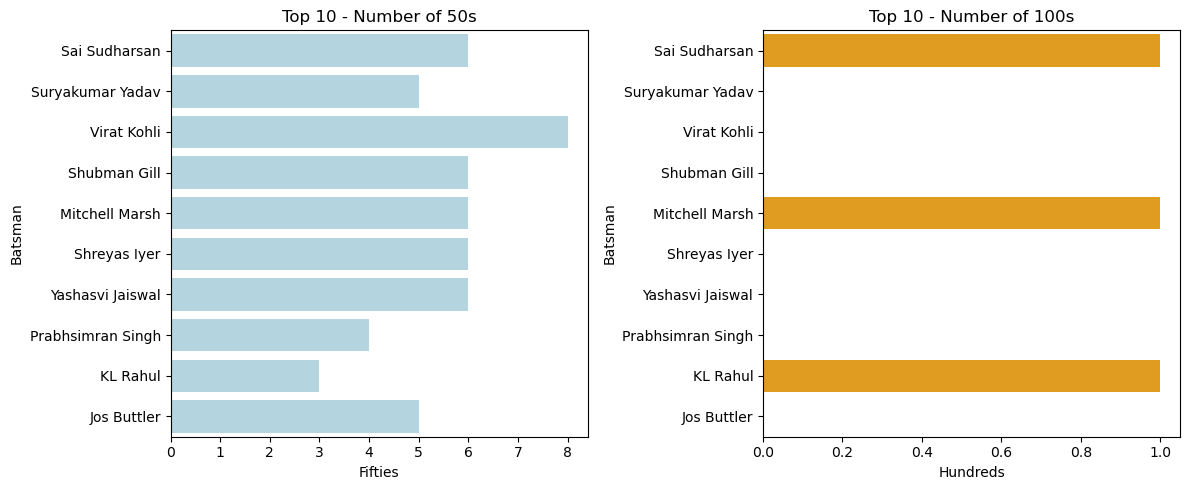

In [105]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.barplot(data=orange_cap_df.head(10), x='Fifties', y='Batsman', color='lightblue')
plt.title('Top 10 - Number of 50s')

plt.subplot(1,2,2)
sns.barplot(data=orange_cap_df.head(10), x='Hundreds', y='Batsman', color='orange')
plt.title('Top 10 - Number of 100s')
plt.tight_layout()
plt.show()

# Top 10 Teams by Total Runs (from Orange Cap Players)
This chart displays the top 10 teams whose players (in the Orange Cap race) have scored the most total runs.

We group the data by Team and sum up the Runs scored by their batsmen.

Only the top 10 teams with the highest totals are shown.

A bar chart is used for visual comparison.

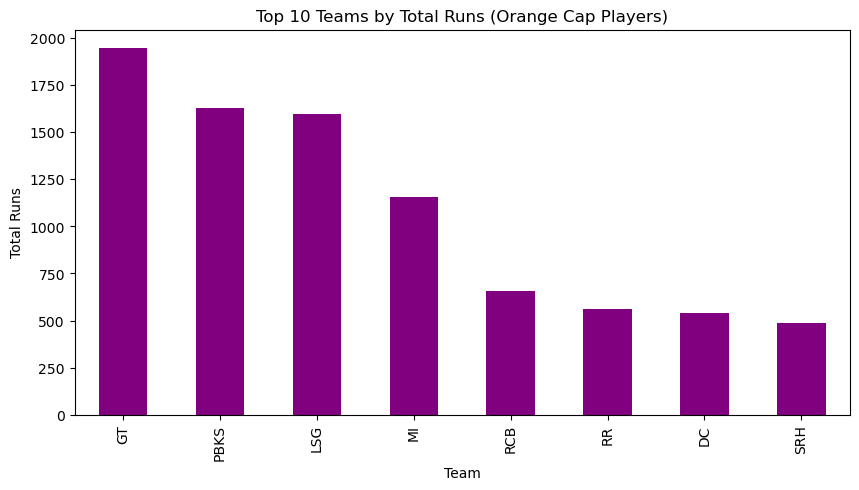

In [107]:
team_runs = orange_cap_df.groupby('Team')['Runs'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
team_runs.plot(kind='bar', color='purple')
plt.title('Top 10 Teams by Total Runs (Orange Cap Players)')
plt.ylabel('Total Runs')
plt.show()

# Top 10 Batsmen with Most Fours (Season Summary)
This chart shows the top 10 batsmen who have hit the most fours in the season, based on the Orange Cap data.

The data is sorted by the Fours column in descending order.

A Seaborn bar chart is used to visualize the number of boundaries.

The plasma color palette gives a vibrant look.

X-axis labels are rotated for better readability.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\2083853446.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fours, x='Batsman', y='Fours', palette='plasma')


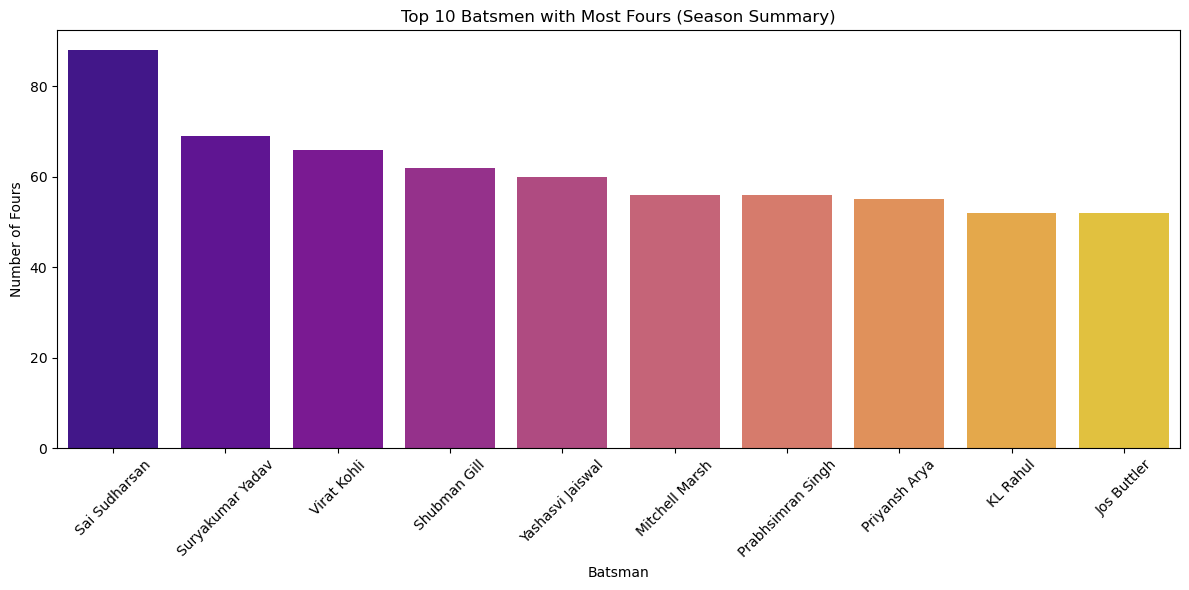

In [109]:
top_fours = orange_cap_df.sort_values(by='Fours', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_fours, x='Batsman', y='Fours', palette='plasma')
plt.title('Top 10 Batsmen with Most Fours (Season Summary)')
plt.xlabel('Batsman')
plt.ylabel('Number of Fours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Batsmen with Most Sixes (Season Summary)
This chart shows the top 10 batsmen who have hit the most sixes during the season, based on the Orange Cap data.

The data is sorted by the Sixes column in descending order.

A Seaborn bar chart is used to display the number of sixes.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\3879579938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sixes, x='Batsman', y='Sixes', palette='magma')


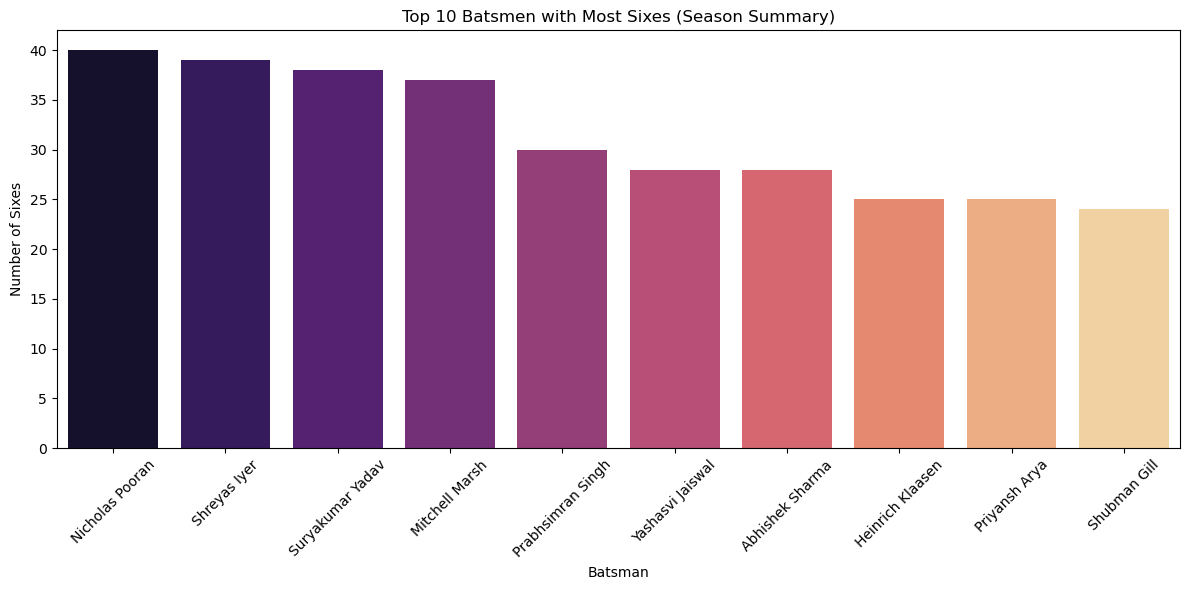

In [111]:
top_sixes = orange_cap_df.sort_values(by='Sixes', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_sixes, x='Batsman', y='Sixes', palette='magma')
plt.title('Top 10 Batsmen with Most Sixes (Season Summary)')
plt.xlabel('Batsman')
plt.ylabel('Number of Sixes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Runs vs Balls Faced – Top 10 Batsmen (Orange Cap)
This chart compares the total runs and balls faced by the top 10 batsmen in the Orange Cap list.

We select the top 10 batsmen based on total runs.

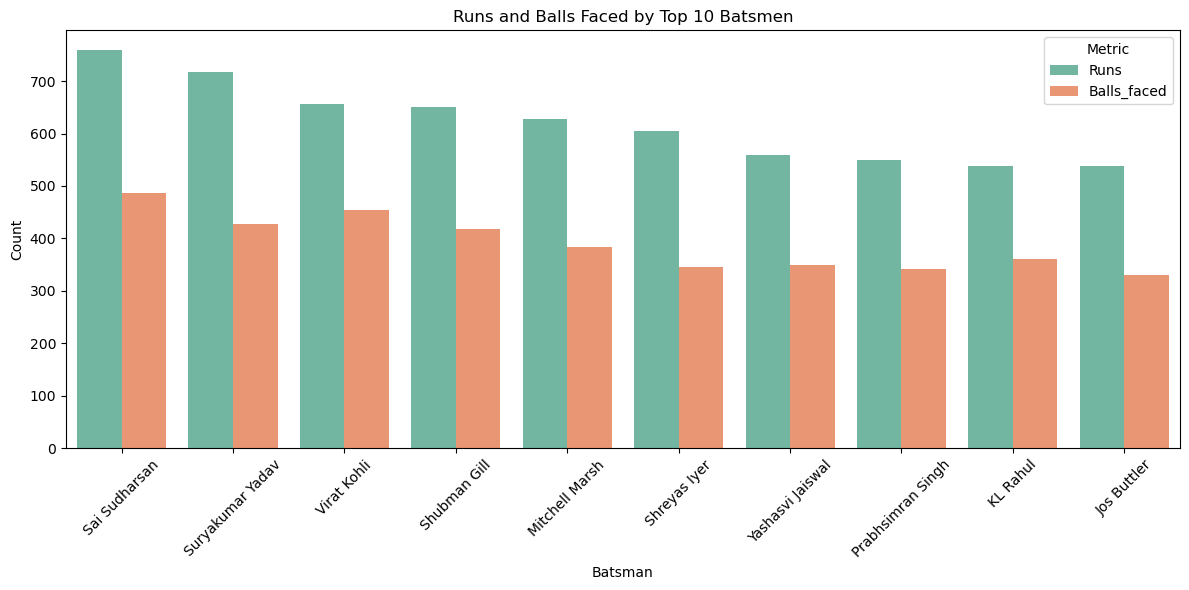

In [113]:
top_batsmen = orange_cap_df.sort_values(by='Runs', ascending=False).head(10)

melted = top_batsmen.melt(id_vars='Batsman', value_vars=['Runs', 'Balls_faced'], var_name='Metric', value_name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=melted, x='Batsman', y='Count', hue='Metric', palette='Set2')
plt.title('Runs and Balls Faced by Top 10 Batsmen')
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Wicket Takers (Purple Cap)
This chart displays the top 10 bowlers who have taken the most wickets in the tournament (Purple Cap contenders).

Data comes from the purple_cap_df which contains top-performing bowlers.

A horizontal bar chart is used to show the number of wickets each bowler has taken.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\1117026241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purple_cap_df, x='Wickets', y='Bowler', palette='rocket')


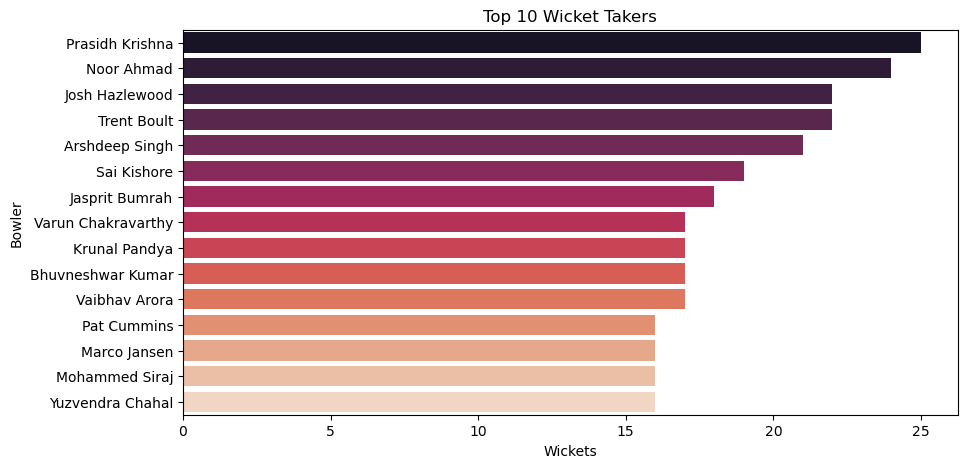

In [115]:
plt.figure(figsize=(10,5))
sns.barplot(data=purple_cap_df, x='Wickets', y='Bowler', palette='rocket')
plt.title('Top 10 Wicket Takers')
plt.show()

# Top 10 Bowlers with Best Economy Rate (Purple Cap)
This chart shows the top 10 bowlers with the lowest economy rates, meaning they give away the fewest runs per over.

The data is sorted by the Economy_rate column in ascending order.

A vertical bar plot is used for clear comparison.

Lower bars indicate more economical bowlers, which is valuable in tight matches.

This helps identify disciplined bowlers who control the run flow effectively.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\3819998386.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_economy, x='Bowler', y='Economy_rate', palette='mako')


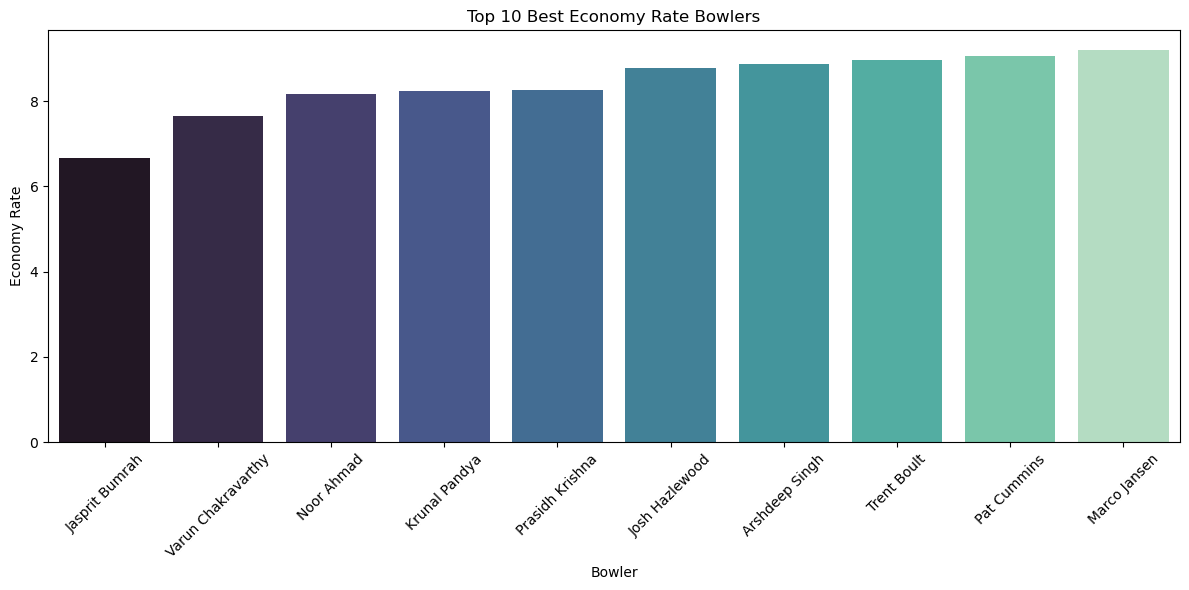

In [117]:
top_economy = purple_cap_df.sort_values(by='Economy_rate').head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_economy, x='Bowler', y='Economy_rate', palette='mako')
plt.title('Top 10 Best Economy Rate Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 Bowling Averages 
This chart displays the top 10 bowlers with the best bowling averages, based on the Purple Cap data.

A new column Avg is calculated by dividing Runs conceded by Wickets taken — lower average means more effective bowling.

Data is sorted to show bowlers with the lowest averages at the top.

A horizontal bar plot is used for easy comparison.

This helps identify consistent wicket-takers who also concede fewer runs, making them highly efficient bowlers.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\2112273785.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg, x='Avg', y='Bowler', palette='coolwarm')


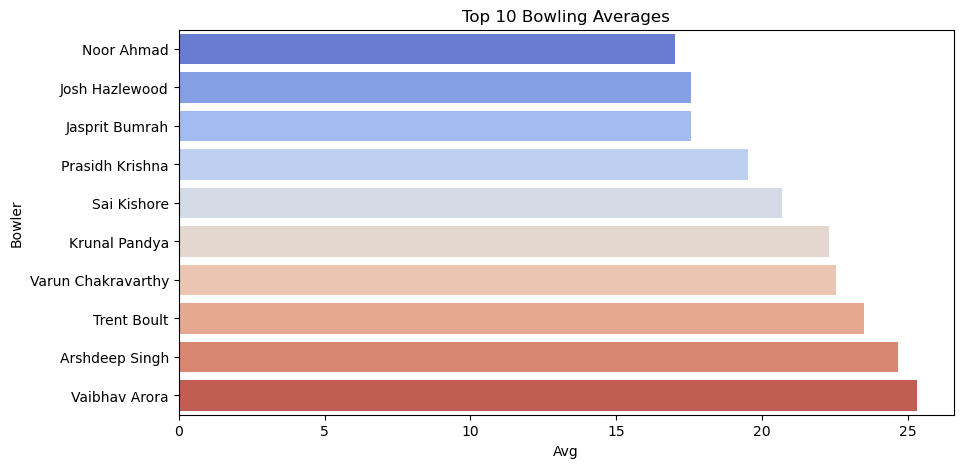

In [119]:
purple_cap_df['Avg'] = purple_cap_df['Runs'] / purple_cap_df['Wickets']
top_avg = purple_cap_df.sort_values(by='Avg').head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_avg, x='Avg', y='Bowler', palette='coolwarm')
plt.title('Top 10 Bowling Averages')
plt.show()

# Total Wickets by Team (Purple Cap Players)
This chart shows the total number of wickets taken by bowlers from each team who are part of the Purple Cap list.

The data is grouped by Team, and the total Wickets are summed up.

A bar chart is used to visualize the total wickets per team.

The darkgreen color emphasizes bowling strength.

This helps identify which teams have had the strongest bowling units, based on the contributions of their top wicket-takers.

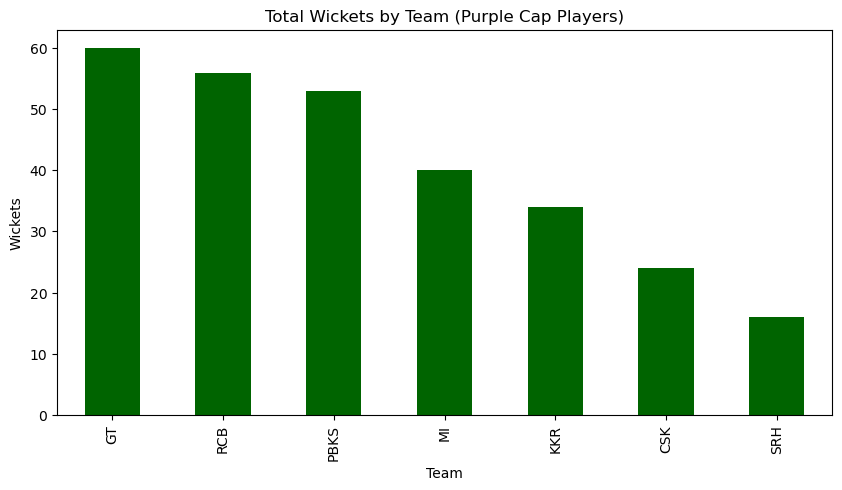

In [121]:
team_wickets = purple_cap_df.groupby('Team')['Wickets'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
team_wickets.plot(kind='bar', color='darkgreen')
plt.title('Total Wickets by Team (Purple Cap Players)')
plt.ylabel('Wickets')
plt.show()

# Economy Rate vs Wickets by Bowlers (Purple Cap)
This scatter plot shows the relationship between a bowler’s Economy Rate and Wicket Count for Purple Cap contenders.

Each point represents a bowler, with:

X-axis → Economy rate (how many runs they give per over)

Y-axis → Total wickets taken

Color (hue) represents the team of the bowler.

Bigger dots (s=100) and some transparency (alpha=0.7) make it easier to spot overlaps.

The legend is placed outside the plot for better readability.

This chart helps analyze:

Which bowlers balance control and wicket-taking.

Teams that produce economical and high-impact bowlers.


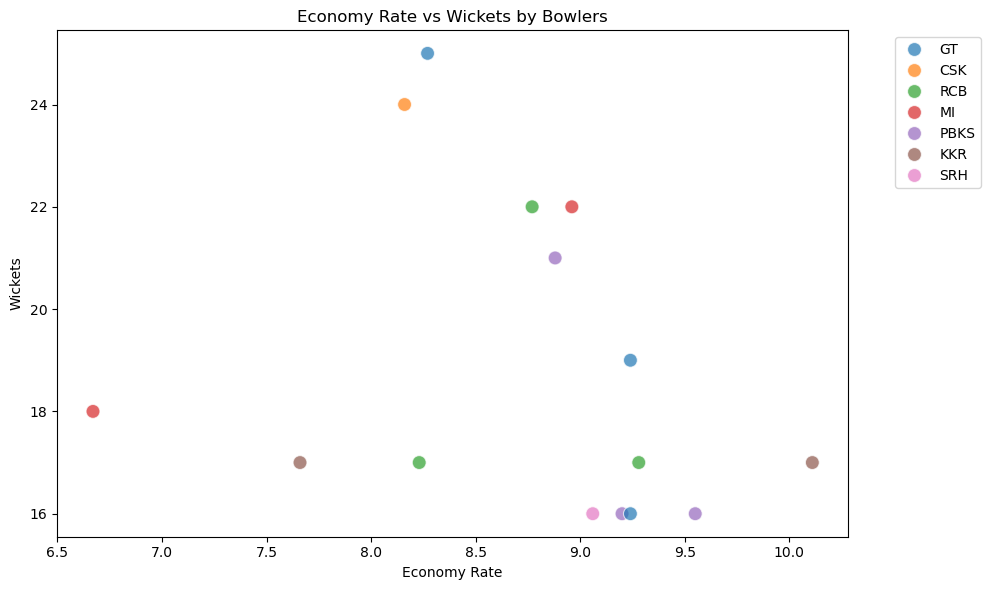

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=purple_cap_df, x='Economy_rate', y='Wickets', hue='Team', palette='tab10', s=100, alpha=0.7)
plt.title('Economy Rate vs Wickets by Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Wickets')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Top 10 Bowlers by Maidens Bowled
This chart highlights the top 10 bowlers who have bowled the most maiden overs — overs in which no runs were conceded.

The data is sorted by the Maidens column in descending order.

A vertical bar chart is used to display the number of maiden overs bowled.

The viridis color palette adds a clean and professional look.

Bowler names are rotated for readability.

Maiden overs show a bowler’s control and pressure-building ability, which is especially important in tight matches.

C:\Users\ACER\AppData\Local\Temp\ipykernel_13932\514267003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bowlers_maidens, x='Bowler', y='Maidens', palette='viridis')


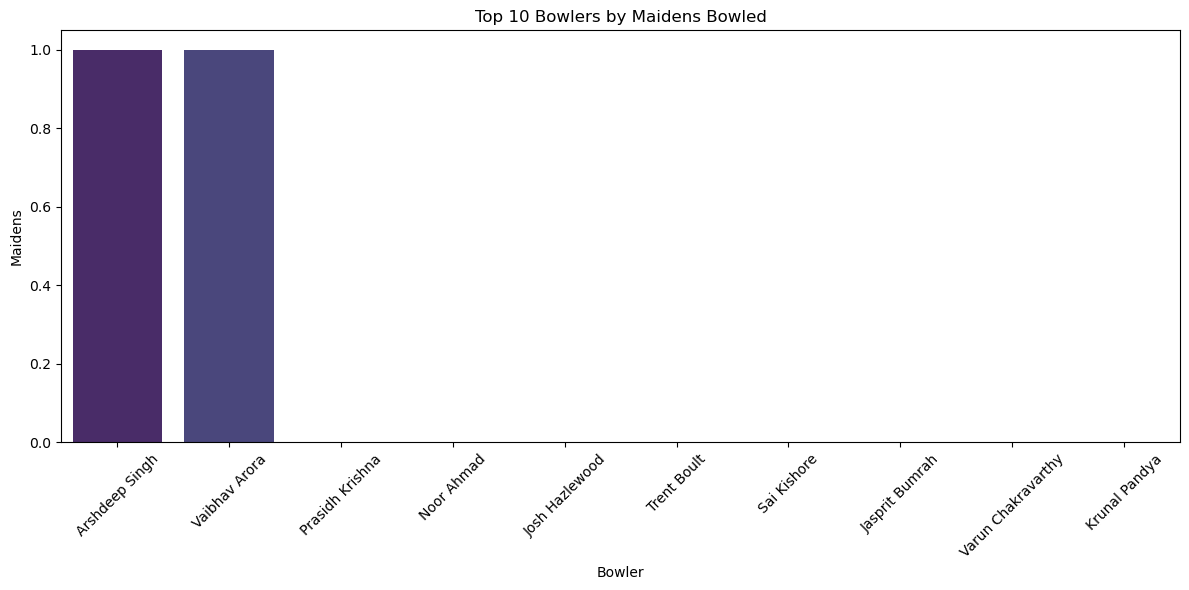

In [125]:
top_bowlers_maidens = purple_cap_df.sort_values(by='Maidens', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_bowlers_maidens, x='Bowler', y='Maidens', palette='viridis')
plt.title('Top 10 Bowlers by Maidens Bowled')
plt.xlabel('Bowler')
plt.ylabel('Maidens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Four and Five Wicket Hauls by Top 10 Bowlers
This chart shows how many times the top 10 wicket-taking bowlers have taken 4-wicket and 5-wicket hauls in a match.

Bowlers are sorted by total Wickets in descending order.

Two stacked bar layers are plotted:

Sky blue represents 4-wicket hauls.

Navy blue represents 5-wicket hauls.

A legend is included to differentiate between the two.

This helps highlight bowlers who regularly deliver match-changing spells, showing both consistency and ability to take multiple wickets in one game.

In [127]:
hauls_df = top_bowlers_hauls[['Bowler', 'Four_wicket_haul', 'Five_wicket_hall']].melt(id_vars='Bowler', var_name='Haul', value_name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=hauls_df, x='Bowler', y='Count', hue='Haul', palette='coolwarm')
plt.title('Four and Five Wicket Hauls by Top 10 Bowlers')
plt.xlabel('Bowler')
plt.ylabel('Number of Hauls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'top_bowlers_hauls' is not defined

# Top 10 Bowlers by Overs Bowled
This chart shows the top 10 bowlers who have bowled the most overs during the season.

The data is sorted by the Overs column in descending order.

A vertical bar chart is used to show how many overs each bowler delivered.

Bowler names are rotated for better readability.

This visualization helps identify the most utilized and trusted bowlers by their teams — those who consistently deliver across matches.

In [ ]:
top_overs = purple_cap_df.sort_values(by='Overs', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_overs, x='Bowler', y='Overs', palette='mako')
plt.title('Top 10 Bowlers by Overs Bowled')
plt.xlabel('Bowler')
plt.ylabel('Overs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wickets Distribution by Team (Purple Cap Players)
This pie chart shows how the total wickets taken by Purple Cap bowlers are distributed across teams.

The data is grouped by Team, and total Wickets are calculated for each.

A pie chart is used to show the percentage share of each team.

autopct='%1.1f%%' displays the percentage values on the chart.

axis('equal') keeps the pie chart perfectly circular.

This chart helps you quickly spot which teams had the strongest bowlers based on total wickets taken.

In [ ]:
team_wickets = purple_cap_df.groupby('Team')['Wickets'].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(team_wickets['Wickets'], labels=team_wickets['Team'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Wickets Distribution by Team')
plt.axis('equal')
plt.show()

# Exploratory Data Analysis with Merged/Combined Columns
we perform EDA after merging datasets or combining multiple columns, to get deeper insights and uncover meaningful patterns.

# Why Merge or Combine Columns?
To bring related data together from multiple DataFrames.

To create new features by combining existing columns.

To enhance analysis by giving more contextual or enriched data.

# Total Runs per Match (with Match Winner Info)
In this analysis, we combine data from two different sources to visualize total runs scored in each match, along with match context.

Calculated total runs per match using groupby on the deliveries_df DataFrame.

Selected the match_winner column from the matches_df DataFrame.

Merged both DataFrames using match_no and match_id to align runs with match winners.

# Visualization:
A line plot shows how total runs varied across matches.

The X-axis represents the match number, and the Y-axis shows the total runs scored in that match.

Data points are marked with circles for better visibility.

This visualization helps us understand the scoring trend across the tournament and gives insight into how match outcomes might relate to high or low scores.

In [ ]:
total_runs = deliveries_df.groupby('match_no')['runs_of_bat'].sum().reset_index()
match_winners = matches_df[['match_id', 'match_winner']]

runs_vs_winner = pd.merge(total_runs, match_winners, left_on='match_no', right_on='match_id')
runs_vs_winner.head()

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=runs_vs_winner, x='match_no', y='runs_of_bat', marker='o', color='green')

plt.title('Total Runs per Match', fontsize=16)
plt.xlabel('Match Number')
plt.ylabel('Total Runs Scored')
plt.grid(True)
plt.tight_layout()
plt.show()

Distribution of Total Runs per Match
This box plot shows the spread and distribution of total runs scored across all matches.

# It Shows:
The orange box represents the middle 50% of matches (interquartile range).

The horizontal line inside the box is the median (typical total score).

Whiskers and outliers (dots) show how much variation exists in match totals — including very high or very low scoring games.

# Use a Box Plot
Great for spotting outliers (matches with unusually high or low runs).

Helps understand how consistent or varied scoring has been throughout the tournament.

This visualization gives a quick summary of scoring behavior and match intensity based on runs.

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=runs_vs_winner, y='runs_of_bat', color='orange')

plt.title('Total Runs per Match Distribution')
plt.ylabel('Total Runs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Orange & Purple Cap Winners by Team
This bar chart compares how many times each team had players who won either the Orange Cap (most runs) or the Purple Cap (most wickets).

# We Did:
Counted the number of Orange Cap winners for each team using orange_cap_df.

Counted the number of Purple Cap winners per team using purple_cap_df.

Merged both counts into a single DataFrame (cap_counts).

# Visualization:
Used a bar chart to show both Orange and Purple Cap counts side by side for each team.

Orange bars represent top run-scorers.

Purple bars represent top wicket-takers.

This plot gives a quick view of which teams consistently produce top-performing batsmen and bowlers in the league.


In [ ]:
orange_counts = orange_cap_df.groupby('Team').size().reset_index(name='Orange_Cap_Wins')
purple_counts = purple_cap_df.groupby('Team').size().reset_index(name='Purple_Cap_Wins')

cap_counts = pd.merge(orange_counts, purple_counts, on='Team')

cap_counts.set_index('Team').plot(kind='bar', figsize=(12,5), color=['orange', 'purple'])
plt.title('Number of Orange & Purple Cap Winners by Team')
plt.ylabel('Number of Cap Wins')
plt.show()

# Conclusion

Through this IPL data analysis using 4 datasets, we discovered several useful insights:

Top Performers: The Orange Cap and Purple Cap analyses revealed the most consistent batsmen and bowlers across seasons. This included players with high runs, top strike rates, and impressive bowling averages.

Team Dominance: Some teams stood out with higher win counts, more cap holders, and balanced performance across batting and bowling.

Toss Decisions: Our analysis showed how choosing to bat or field after winning the toss influenced match results, providing strategic hints for future matches.

Winning Margins: Histograms and boxplots showed how teams win – either by large margins or close contests – and how often.

Venue Importance: Certain venues hosted more matches, and some players performed particularly well at these grounds.

Combined Insights: By merging datasets, we compared total runs scored from delivery data with the runs recorded in the Orange Cap data, and we also explored cap wins per team.

# Final Thoughts – Analysis
After performing a comprehensive exploratory data analysis (EDA) using four IPL datasets — matches_df, deliveries_df, orange_cap_df, and purple_cap_df — I was able to extract a wide range of insights. Below are the final takeaways from my project:

# 1. Player Performance Trends Were Crystal Clear
In my project, I highlighted the top-performing batsmen using Orange Cap data:

Players with the most runs, fifties, and centuries were clearly visible.

I also emphasized the role of strike rates and not-outs in determining batting consistency.

Using bar plots and line plots, I compared actual runs from deliveries with Orange Cap stats to assess accuracy and consistency.

# For the bowlers:

I showcased the top wicket-takers, those with the best economy rates, and those with the most maidens and best averages.

I included players with four-wicket and five-wicket hauls, providing deeper insight into their match-winning abilities.

These trends helped me identify consistent performers and potential game-changers across multiple seasons.

# 2. Team Strategies and Strengths Became Obvious
By aggregating and analyzing team-level stats:

I found out which teams scored the most total runs through Orange Cap players and which teams took the most wickets using Purple Cap data.

I visualized the number of Orange and Purple Cap winners by team, which indicated the teams’ strengths — whether in batting, bowling, or both.

This analysis helped me evaluate team strategies and balance.

# 3. Toss and Match Outcome Relationship Was Insightful
I explored the relationship between toss decisions and match results:

My visualizations showed patterns around whether teams preferred to bat or field first.

It also revealed whether winning the toss influenced the final outcome, suggesting both psychological and strategic implications.

Such insights can be helpful for understanding how teams adapt to match situations.

# 4. Venue and Match Conditions Were Not Ignored
I analyzed the top venues based on the number of matches hosted:

This helped reveal home advantage trends and frequently used grounds.

Some venues seemed more favorable for batting, while others supported bowlers — important factors for team planning.

# 5. Data Combination Made the Story Stronger
One of the most important aspects of my project was merging and combining datasets:

I merged deliveries_df with orange_cap_df to validate player run totals and compare them side by side.

I combined total match runs with match winners to explore how scoring impacted outcomes.

I also compared Orange and Purple Cap wins by team in a combined bar chart to show which franchises consistently produced top talent.

These merged insights added a layer of depth and storytelling to the analysis.

# Overall Impact of My Project
In this project, I didn’t just visualize data — I worked to interpret the stories behind the numbers. Through this EDA:

I discovered what made players and teams successful over seasons.

I analyzed game strategies, team strengths, and consistency.

I connected raw numbers to real-world performance insights.

I created clean, clear, and informative visualizations using matplotlib and seaborn.

# This kind of work can be valuable for:

Analysts and coaches preparing for upcoming matches.

Cricket fans who want a deeper look at performance stats.

Media professionals summarizing season stories.

Even data science practitioners looking to build predictive models or simulations.

# Data Analysis Done 